In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.markers
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab

from matplotlib import rc
%matplotlib inline
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})


# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'


# Reward


In [37]:
Progress_PPO = pd.read_csv('data/output/PPO/progress.csv')
Progress_DDPG = pd.read_csv('data/output/DDPG/progress.csv')
Progress_A2C = pd.read_csv('data/output/A2C/progress.csv')
Progress_TD3 = pd.read_csv('data/output/TD3/progress.csv')
Progress_SAC = pd.read_csv('data/output/SAC/progress.csv')
Progress_DDPG_custom = pkl.load(open('Notebooks/DDPG_dynamic_True_noise_False_rewards_dqn.pkl', "rb"))

In [3]:
Rewards_DDPG = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_True_rewards_dqn.pkl', "rb"))
rewards_df = pd.DataFrame()
rewards_df['reward'] = Rewards_DDPG[:-1]

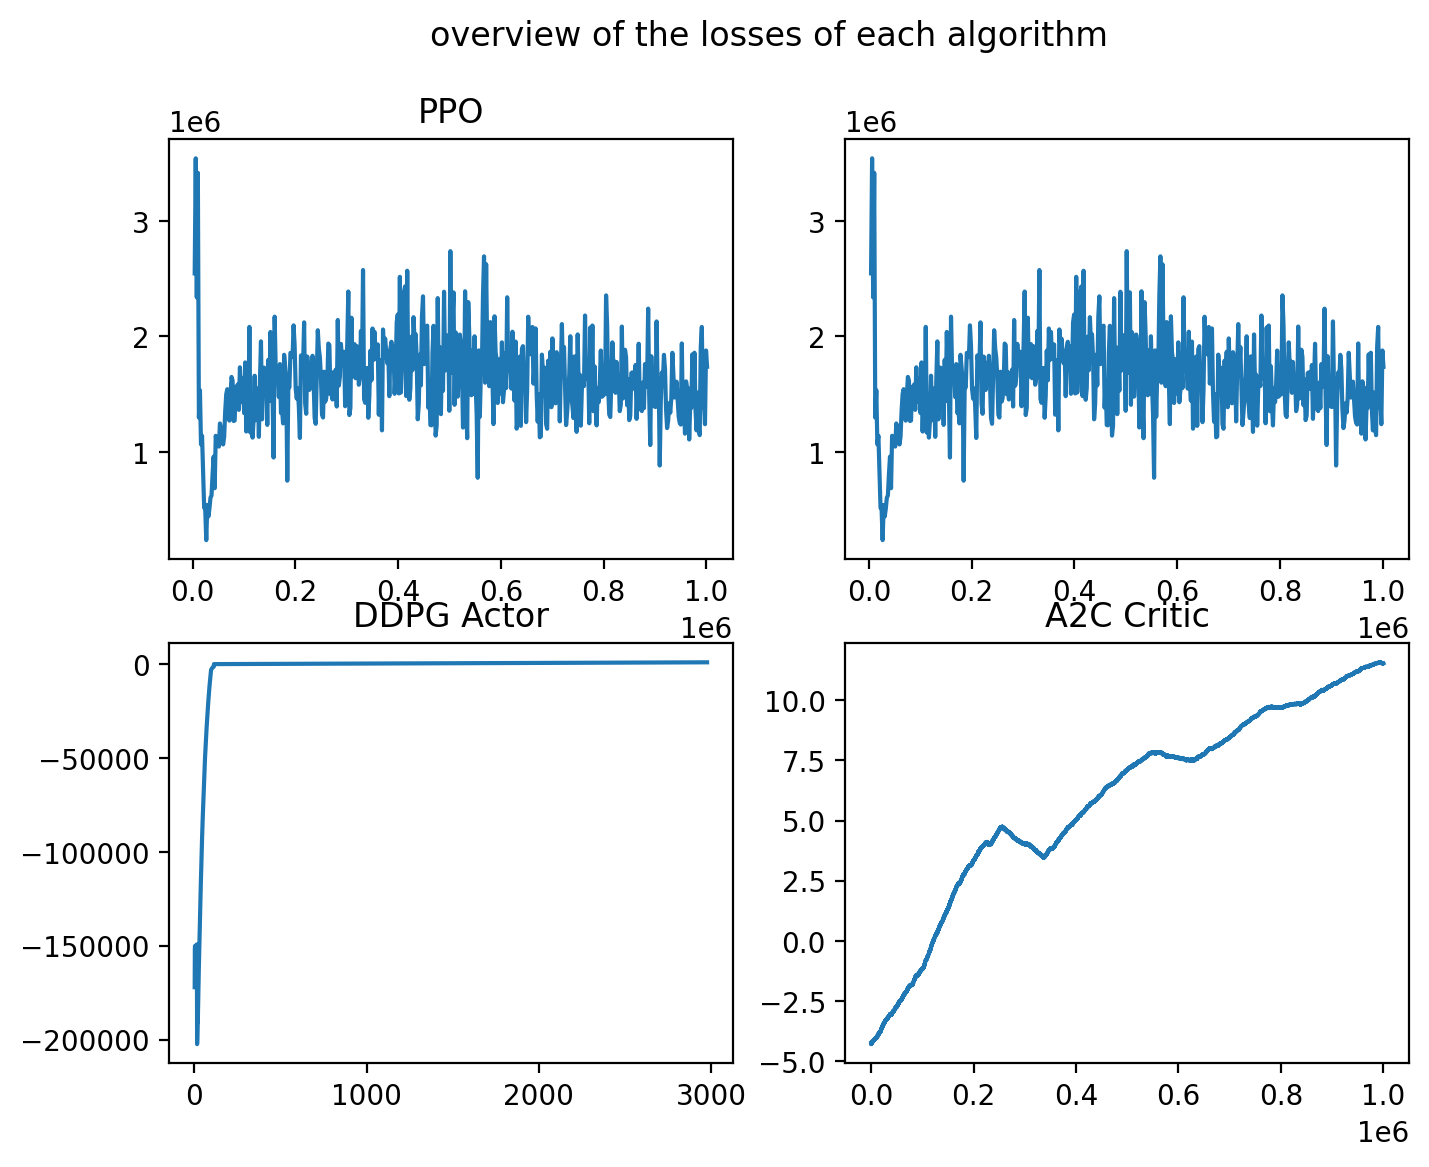

In [4]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
fig.suptitle('overview of the losses of each algorithm')


axs[0, 0].set_title('PPO')
axs[0, 0].plot(Progress_PPO["time/total_timesteps"], Progress_PPO["train/loss"])
axs[0, 1].plot(Progress_PPO["time/total_timesteps"], Progress_PPO["train/loss"])

axs[1, 0].set_title('DDPG Actor')
axs[1, 0].plot(Progress_DDPG["time/episodes"], Progress_DDPG["train/actor_loss"])
axs[1, 1].set_title('A2C Critic')
axs[1, 1].plot(Progress_A2C["time/total_timesteps"], Progress_A2C["train/entropy_loss"])


plt.show()

# Reward

In [38]:
Progress_DDPG_custom

[-116087.15373429978,
 -76677.15600687651,
 -11183.822768190972,
 -6769.030672635907,
 -7814.581195323339,
 -20685.597926532126,
 -2523.1637399935385,
 2943.917237904001,
 -2038.6832890000892,
 -19181.343693829993,
 -22981.46058068757,
 -1949.4445268569946,
 1838.632285916409,
 16067.160546587973,
 -8716.100808598987,
 15353.88285721035,
 6529.826199721339,
 -17738.119494666087,
 -4289.707802047618,
 1611.0857981405366,
 3012.7590805959608,
 16513.733683226408,
 2039.7267480678195,
 35704.14351956767,
 -4951.447054986707,
 15467.526407991925,
 4387.178317919041,
 12121.173375039358,
 4878.854170003957,
 19318.133628312116,
 -9803.154937977166,
 -17449.86937631312,
 -23.545680188352456,
 17165.378829738052,
 14124.558830849102,
 34926.44065751137,
 -2673.462638585297,
 -22346.681804430016,
 7016.805172824722,
 -6593.168467034639,
 -6518.095659599515,
 8598.380603563637,
 -4197.560815262403,
 -6796.179831085367,
 10055.667573407562,
 30130.88598698053,
 -2255.5584270512686,
 -15.56174446

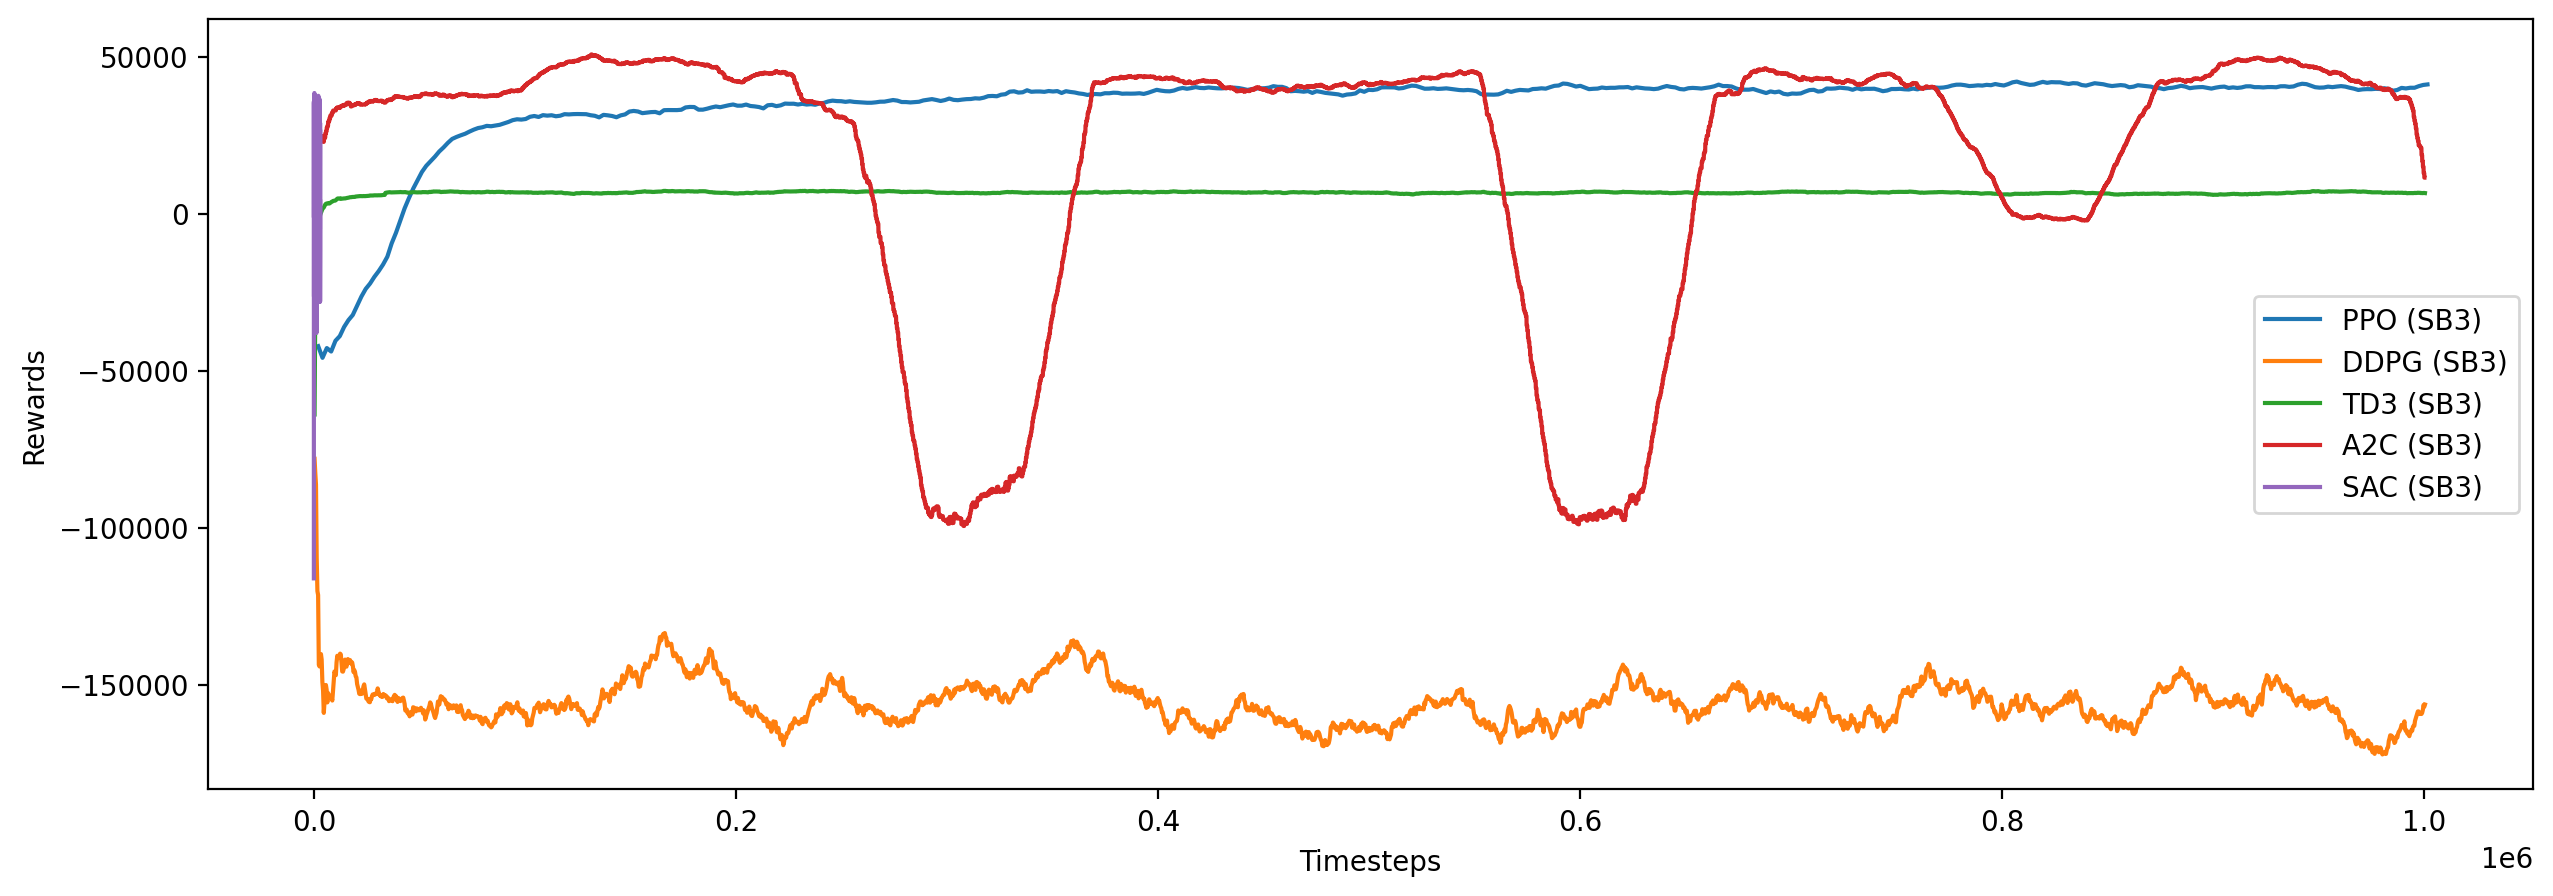

In [40]:
import matplotlib.pyplot as plt
import numpy as np


# Generiere einige Daten


# Erstelle eine Figur und Achsen mit Matplotlib
fig, ax = plt.subplots(figsize=(15,5))

# Zeichne die Daten
ax.plot(Progress_PPO["time/total_timesteps"], Progress_PPO["rollout/ep_rew_mean"] , label='PPO (SB3)')
#ax.plot(rewards_df['reward'], label='DDPG (own development)')
ax.plot(Progress_DDPG["time/total_timesteps"], Progress_DDPG["rollout/ep_rew_mean"], label='DDPG (SB3)')
ax.plot(Progress_TD3["time/total_timesteps"], Progress_TD3["rollout/ep_rew_mean"], label='TD3 (SB3)')
ax.plot(Progress_A2C["time/total_timesteps"], Progress_A2C["rollout/ep_rew_mean"], label='A2C (SB3)')
#ax.plot(Progress_DDPG_custom, label='SAC (SB3)')
#ax.plot(Progress_A2C["rollout/ep_rew_mean"], label='A2C (SB3)', linestyle=':', marker='o')


# Setze Titel und Beschriftungen
#ax.set_title('Ein Beispielplot für eine Dissertation', fontsize=16)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Rewards')


# Füge Legende hinzu
ax.legend()

# Zeige den Plot
plt.show()

Cost

In [6]:
evalPPO = pkl.load(open('data/output/PPO/PPO_eval.pkl', "rb"))
evalDDPG = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', "rb"))
evalA2C = pkl.load(open('data/output/A2C/A2C_eval.pkl', "rb"))
evalTD3 = pkl.load(open('data/output/TD3/TD3_eval.pkl', "rb"))
evalDDPG_custom = pkl.load(open('data/output/DDPG_Custom/DDPG_eval.pkl', 'rb'))

In [7]:
cost_ppo = evalPPO['Cost'].sum()
cost_ddpg = evalDDPG['Cost'].sum()
cost_a2c = evalA2C['Cost'].sum()
cost_td3 = evalTD3['Cost'].sum()

cost_ppo_gas = (evalPPO['Prices Natural gas'] * evalPPO['Natural Gas']).sum() 
cost_ddpg_gas = (evalDDPG['Prices Natural gas'] * evalDDPG['Natural Gas']).sum() 
cost_a2c_gas = (evalA2C['Prices Natural gas'] * evalA2C['Natural Gas']).sum() 
cost_td3_gas = (evalTD3['Prices Natural gas'] * evalTD3['Natural Gas']).sum() 

positive_power_rows = evalPPO[evalPPO['Power'] > 0]
cost_ppo_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()

positive_power_rows = evalTD3[evalTD3['Power'] > 0]
cost_td3_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()

positive_power_rows = evalA2C[evalA2C['Power'] > 0]
cost_a2c_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()

positive_power_rows = evalDDPG[evalDDPG['Power'] > 0]
cost_ddpg_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()

hydrogen_ppo = evalPPO['Hydrogen'].sum()
hydrogen_ddpg = evalDDPG['Hydrogen'].sum()
hydrogen_a2c = evalA2C['Hydrogen'].sum()
hydrogen_td3 = evalTD3['Hydrogen'].sum()
hydrogen_ddpg_custom = evalDDPG_custom['Hydrogen'].sum()



profit_ppo = evalPPO['Profits'].sum() * 300
profit_a2c = evalA2C['Profits'].sum() * 300
profit_ddpg = evalDDPG['Profits'].sum() * 300
profit_td3 = evalTD3['Profits'].sum() * 300


df = pd.DataFrame({
    'Algorithm': ['PPO', 'A2C', 'DDPG', 'TD3', 'DDPG (custom)'],
    'Strom': [cost_ppo_energy, cost_a2c_energy, cost_ddpg_energy, cost_td3_energy, hydrogen_ddpg_custom],
    'Gas': [cost_ppo_gas, cost_a2c_gas, cost_ddpg_gas, cost_td3_gas, hydrogen_ddpg_custom],
    'Total Cost': [cost_ppo_gas + cost_ppo_energy, cost_a2c_gas + cost_a2c_energy, cost_ddpg_gas + cost_ddpg_energy, cost_td3_gas + cost_td3_energy, hydrogen_ddpg_custom],
    'Ammonia Profit': [profit_ppo, profit_a2c, cost_ddpg_gas, profit_td3, hydrogen_ddpg_custom],
    'Hydrogen': [hydrogen_ppo, hydrogen_a2c, hydrogen_ddpg, hydrogen_td3, hydrogen_ddpg_custom]
})


df['Strom'] = df['Strom'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Gas'] = df['Gas'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Ammonia Profit'] = df['Ammonia Profit'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Total Cost'] = df['Total Cost'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Hydrogen'] = df['Hydrogen'].apply(lambda x: "{:0,.2f} kg".format(x))

print(df)

       Algorithm         Strom           Gas    Total Cost  Ammonia Profit  \
0            PPO   $ 22,959.32  $ 205,594.59  $ 228,553.91  $ 6,844,050.00   
1            A2C  $ 277,405.99    $ 1,702.88  $ 279,108.87  $ 6,844,050.00   
2           DDPG  $ 240,086.39        $ 0.00  $ 240,086.39          $ 0.00   
3            TD3      $ 292.77  $ 469,612.25  $ 469,905.03  $ 6,844,050.00   
4  DDPG (custom)   $ 40,107.75   $ 40,107.75   $ 40,107.75     $ 40,107.75   

        Hydrogen  
0   56,720.83 kg  
1  118,564.57 kg  
2  118,919.56 kg  
3        0.00 kg  
4   40,107.75 kg  


In [8]:
sum(evalDDPG['Hydrogen'])

118919.55636922047

In [9]:
rewards = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_True_rewards_dqn.pkl', "rb"))

In [10]:
rewards[-1]

-3200.000090080085

In [11]:
costs = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_True_price_ammonia_ddpg.pkl', "rb"))

In [12]:
costs[-1]

302.1858381807287

In [13]:
eval_data = pkl.load(open('data/output/PPO/PPO_eval.pkl', 'rb'))

In [14]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [15]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [16]:
r = rewards_df.fillna(rewards_df.mean())

In [17]:
moving_avg = r.rolling(window=10).mean()

In [18]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

## Evaluation

In [19]:
eval_data = pkl.load(open('data/output/PPO/PPO_eval.pkl', 'rb'))
eval_data_td3 = pkl.load(open('data/output/TD3/TD3_eval.pkl', 'rb'))

In [20]:
eval_data_td3

Actions       Rewards  Action1  Action2  Action3  PV Generation  \
0          [0, 0, 0]             0      0.0      0.0      0.0            0.0   
1    [1.0, 1.0, 0.0]  [-240.59412]      1.0      1.0      0.0            0.0   
2    [1.0, 1.0, 0.0]    [4.273392]      1.0      1.0      0.0            0.0   
3    [1.0, 1.0, 0.0]   [28.028393]      1.0      1.0      0.0            0.0   
4    [1.0, 1.0, 0.0]   [30.381742]      1.0      1.0      0.0            0.0   
..               ...           ...      ...      ...      ...            ...   
332  [1.0, 1.0, 0.0]   [27.700373]      1.0      1.0      0.0            0.0   
333  [1.0, 1.0, 0.0]   [27.700373]      1.0      1.0      0.0            0.0   
334  [1.0, 1.0, 0.0]   [27.700373]      1.0      1.0      0.0            0.0   
335  [1.0, 1.0, 0.0]   [27.700373]      1.0      1.0      0.0            0.0   
336  [1.0, 1.0, 0.0]   [27.700373]      1.0      1.0      0.0            0.0   

                Datetime  Gas Consumption        Cost  Prices  Profits  \
0    2018-08-01 00:00:00                0    0.000000   54.25      0.0   
1    2018-08-01 01:00:00                0 -233.805878   52.74     68.1   
2    2018-08-01 02:00:00                0   11.086608   52.30     68.1   
3    2018-08-01 03:00:00                0   34.841608   52.33     68.1   
4    2018-08-01 04:00:00                0   37.194958   55.00     68.1   
..                   ...              ...         ...     ...      ...   
332  2018-08-14 20:00:00                0   40.399627   63.90     68.1   
333  2018-08-14 21:00:00                0   40.399627   61.99     68.1   
334  2018-08-14 22:00:00                0   40.399627   59.01     68.1   
335  2018-08-14 23:00:00                0   40.399627   54.79     68.1   
336  2016-08-20 00:00:00                0    0.000000   44.60      0.0   

     Ammonia  Prices Natural gas  Moles    Storage  Power  Sun Power  \
0        0.0                2.80   10.0        0.0  0.000        0.0   
1    10000.0                2.80    0.0  4500000.0  5.000        0.0   
2    10000.0                2.80    0.0  4950000.0  0.500        0.0   
3    10000.0                2.80    0.0  4995000.0  0.050        0.0   
4    10000.0                2.80    0.0  4999500.0  0.005        0.0   
..       ...                 ...    ...        ...    ...        ...   
332  10000.0                3.02    0.0  5000000.0  0.000        0.0   
333  10000.0                3.02    0.0  5000000.0  0.000        0.0   
334  10000.0                3.02    0.0  5000000.0  0.000        0.0   
335  10000.0                3.02    0.0  5000000.0  0.000        0.0   
336      0.0                2.67   10.0        0.0  0.000        0.0   

     Hydrogen  Wind Power  Natural Gas  
0         0.0           0       0.0000  
1         0.0           0     481.0396  
2         0.0           0     481.2000  
3         0.0           0     481.2000  
4         0.0           0     481.2000  
..        ...         ...          ...  
332       0.0           0     481.2000  
333       0.0           0     481.2000  
334       0.0           0     481.2000  
335       0.0           0     481.2000  
336       0.0           0       0.0000  

[337 rows x 20 columns]

In [21]:
eval_data['Date'] = pd.date_range(start='2019-05-01',end='2020-04-30', periods=len(eval_data))
eval_data.index = eval_data['Date']

# intervall (stunde)

/var/folders/56/zg0fn3gn6l9f7bd64sff_jjc0000gn/T/ipykernel_50079/4022629592.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['Storage'] = one_week['Storage']*1e-6


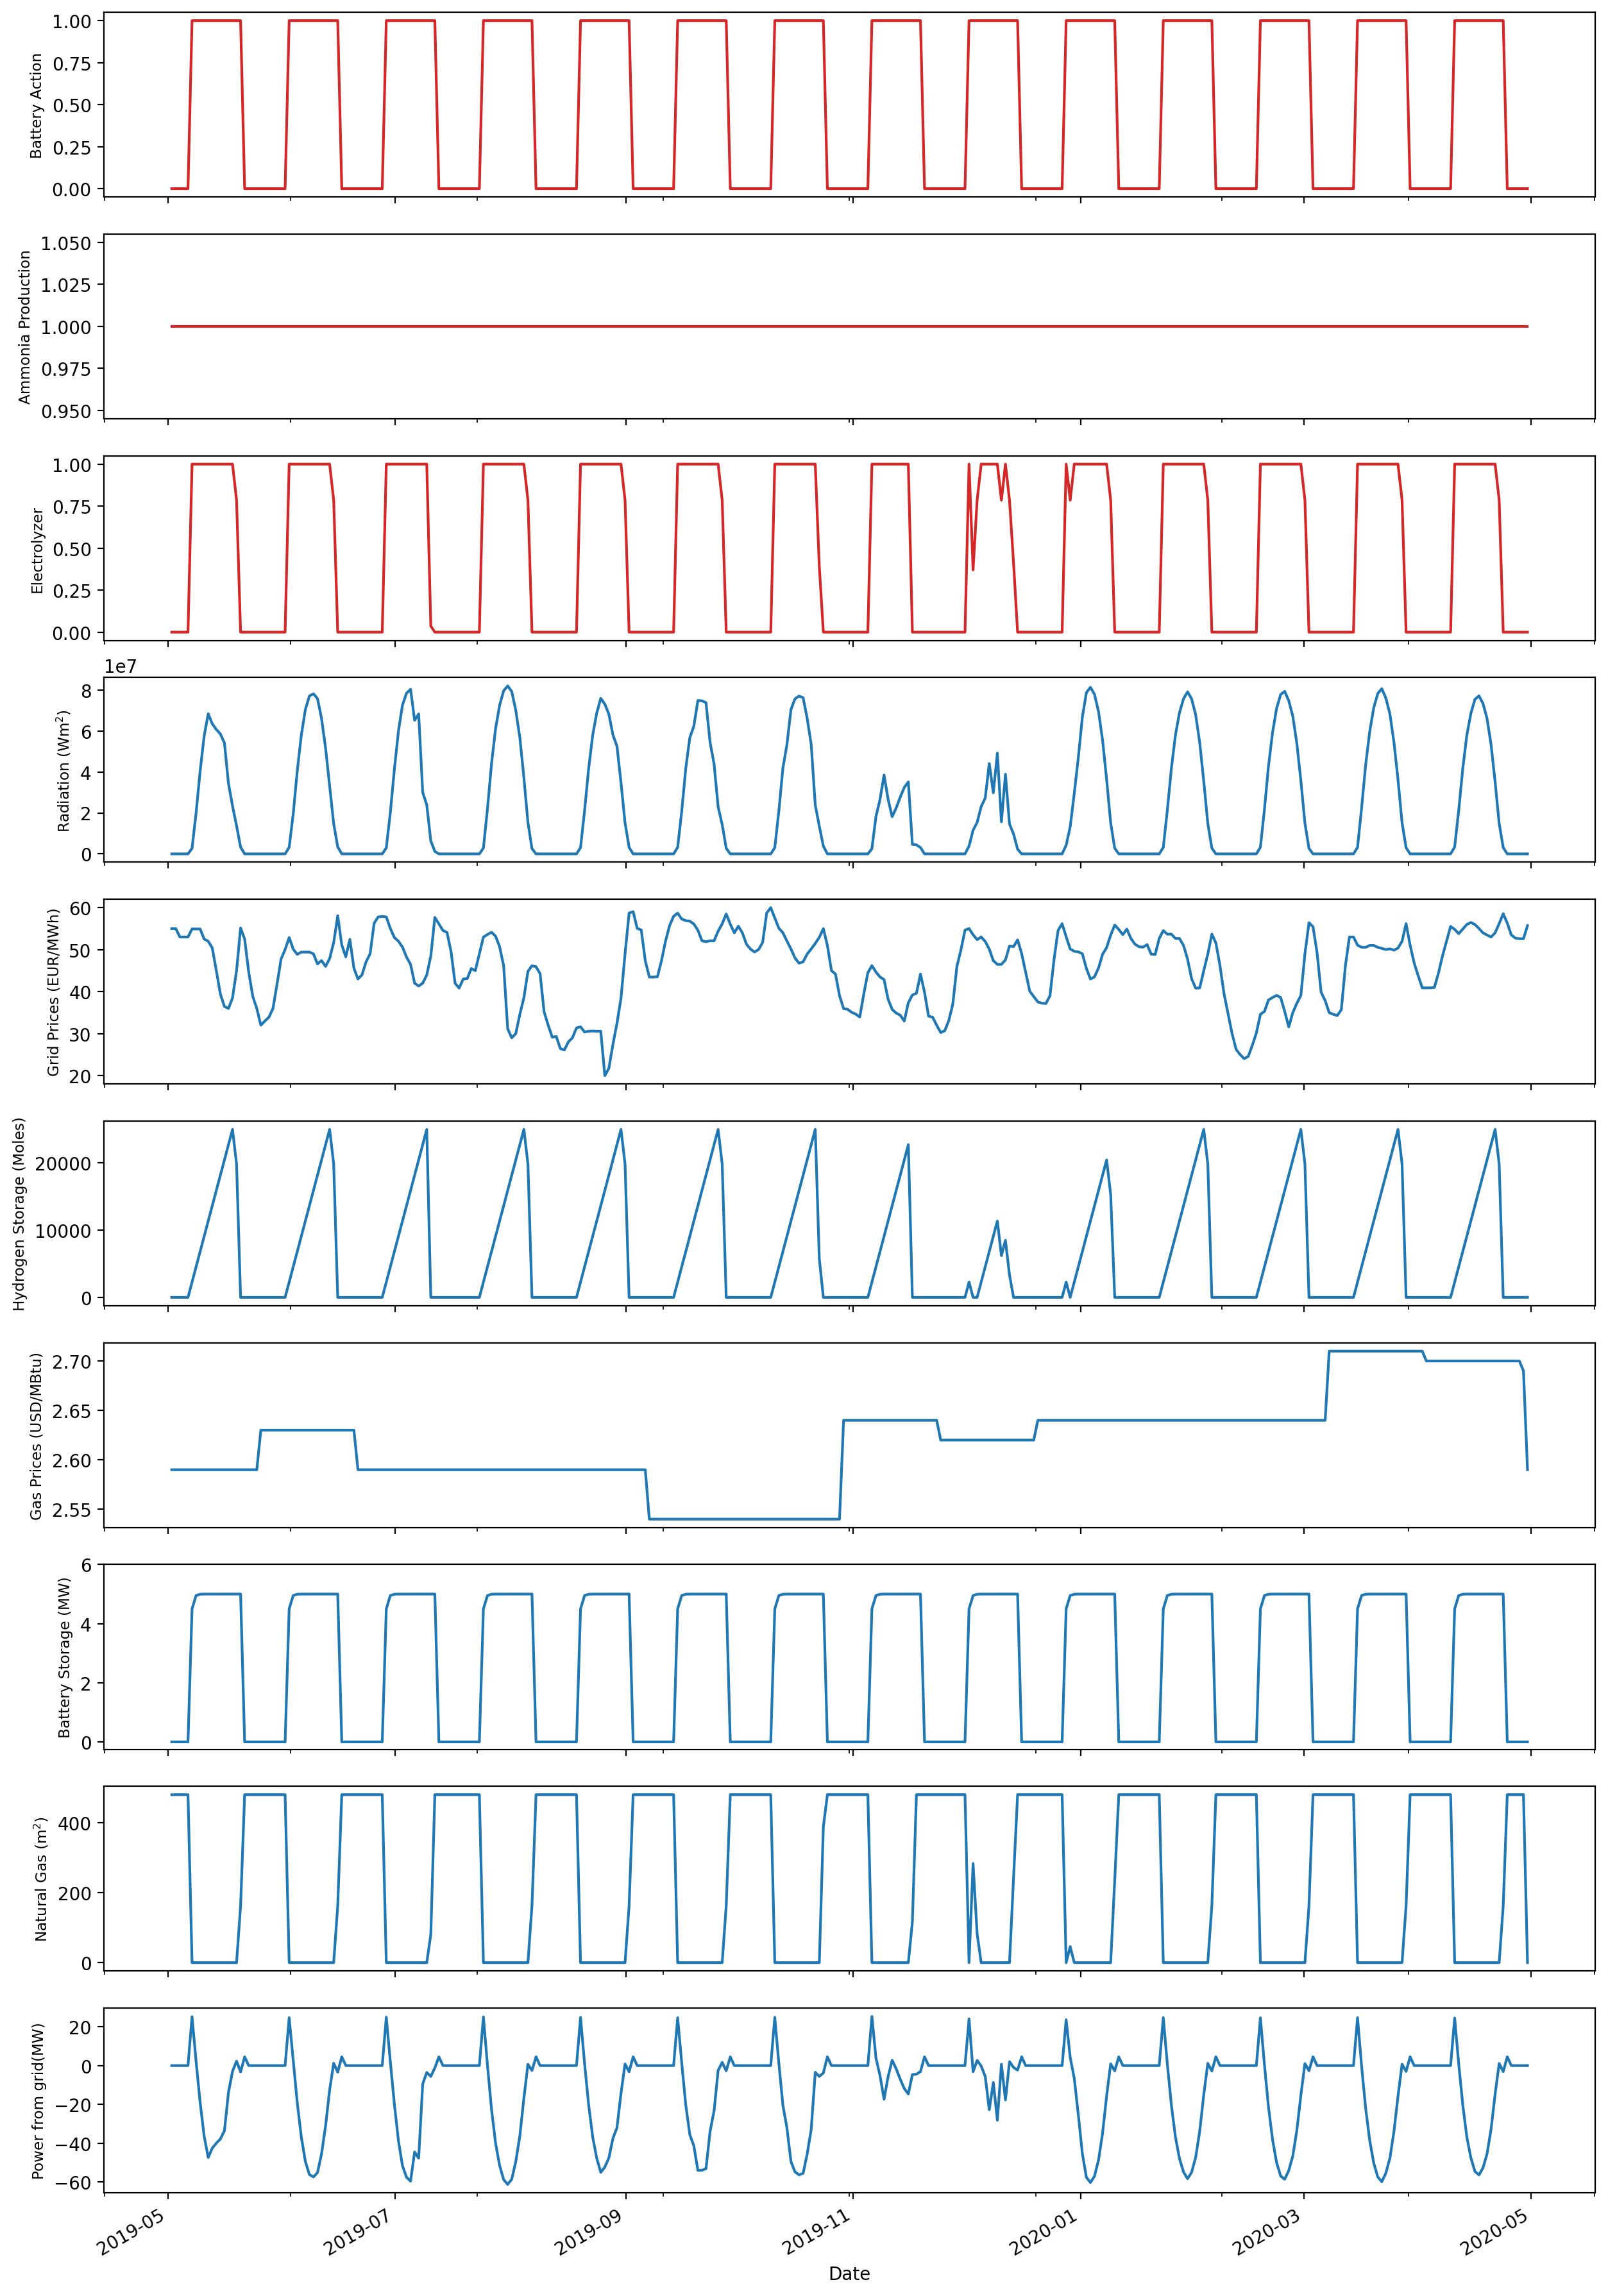

In [22]:
f, axs = plt.subplots(10,figsize=(15,25), sharex=True) #nrows=1, ncols=2,
one_week = eval_data.iloc[1:]
#df = df.iloc[3:]
#one_week = eval_data.iloc[0:24*7*2]
#E69F00

one_week['Action1'].plot(ax=axs[0], legend=False, color="#d62728")
axs[0].set_ylabel('Battery Action', fontsize='small')

one_week['Action2'].plot(ax=axs[1], legend=False, color="#d62728")
axs[1].set_ylabel('Ammonia Production', fontsize='small')

one_week['Action3'].plot(ax=axs[2], legend=False, color="#d62728")
axs[2].set_ylabel('Electrolyzer', fontsize='small')

one_week['PV Generation'].plot(ax=axs[3], legend=False, color="#1f77b4")
axs[3].set_ylabel('Radiation (W$m^2$) ', fontsize='small')

one_week['Prices'].plot(ax=axs[4], linewidth=1.5, color="#1f77b4")
axs[4].set_ylabel('Grid Prices (EUR/MWh)', fontsize='small')

one_week['Moles'].plot(ax=axs[5], legend=False, color="#1f77b4")
axs[5].set_ylabel('Hydrogen Storage (Moles)', fontsize='small')

one_week['Prices Natural gas'].plot(ax=axs[6], legend=False, color="#1f77b4")
axs[6].set_ylabel('Gas Prices (USD/MBtu)', fontsize='small')

one_week['Storage'] = one_week['Storage']*1e-6
one_week['Storage'].plot(ax=axs[7], legend=False, color="#1f77b4")
axs[7].set_ylabel('Battery Storage (MW)', fontsize='small')
axs[7].set_ylim([None, 6]) 

one_week['Natural Gas'].plot(ax=axs[8], legend=False, color="#1f77b4")
axs[8].set_ylabel('Natural Gas ($m^2$)', fontsize='small')

one_week['Power'].plot(ax=axs[9], legend=False, color="#1f77b4")
axs[9].set_ylabel('Power from grid(MW)', fontsize='small')


#self.sun_power, self.price, self.storage, self.moles, self.natural_gas_price

plt.subplots_adjust(hspace=0.2)
plt.savefig('data/output/DDPG/images/simulation_result.jpg',  dpi=400, bbox_inches='tight')


Load data

In [23]:
eval_data_ppo = pkl.load(open('data/output/PPO/PPO_eval.pkl', 'rb'))
eval_data_td3 = pkl.load(open('data/output/TD3/TD3_eval.pkl', 'rb'))
eval_data_ddpg = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))
eval_data_a2c = pkl.load(open('data/output/A2C/A2C_eval.pkl', 'rb'))

eval_data_ddpg_custom = pkl.load(open('data/output/DDPG_Custom/DDPG_eval.pkl', 'rb'))



Battery Storage

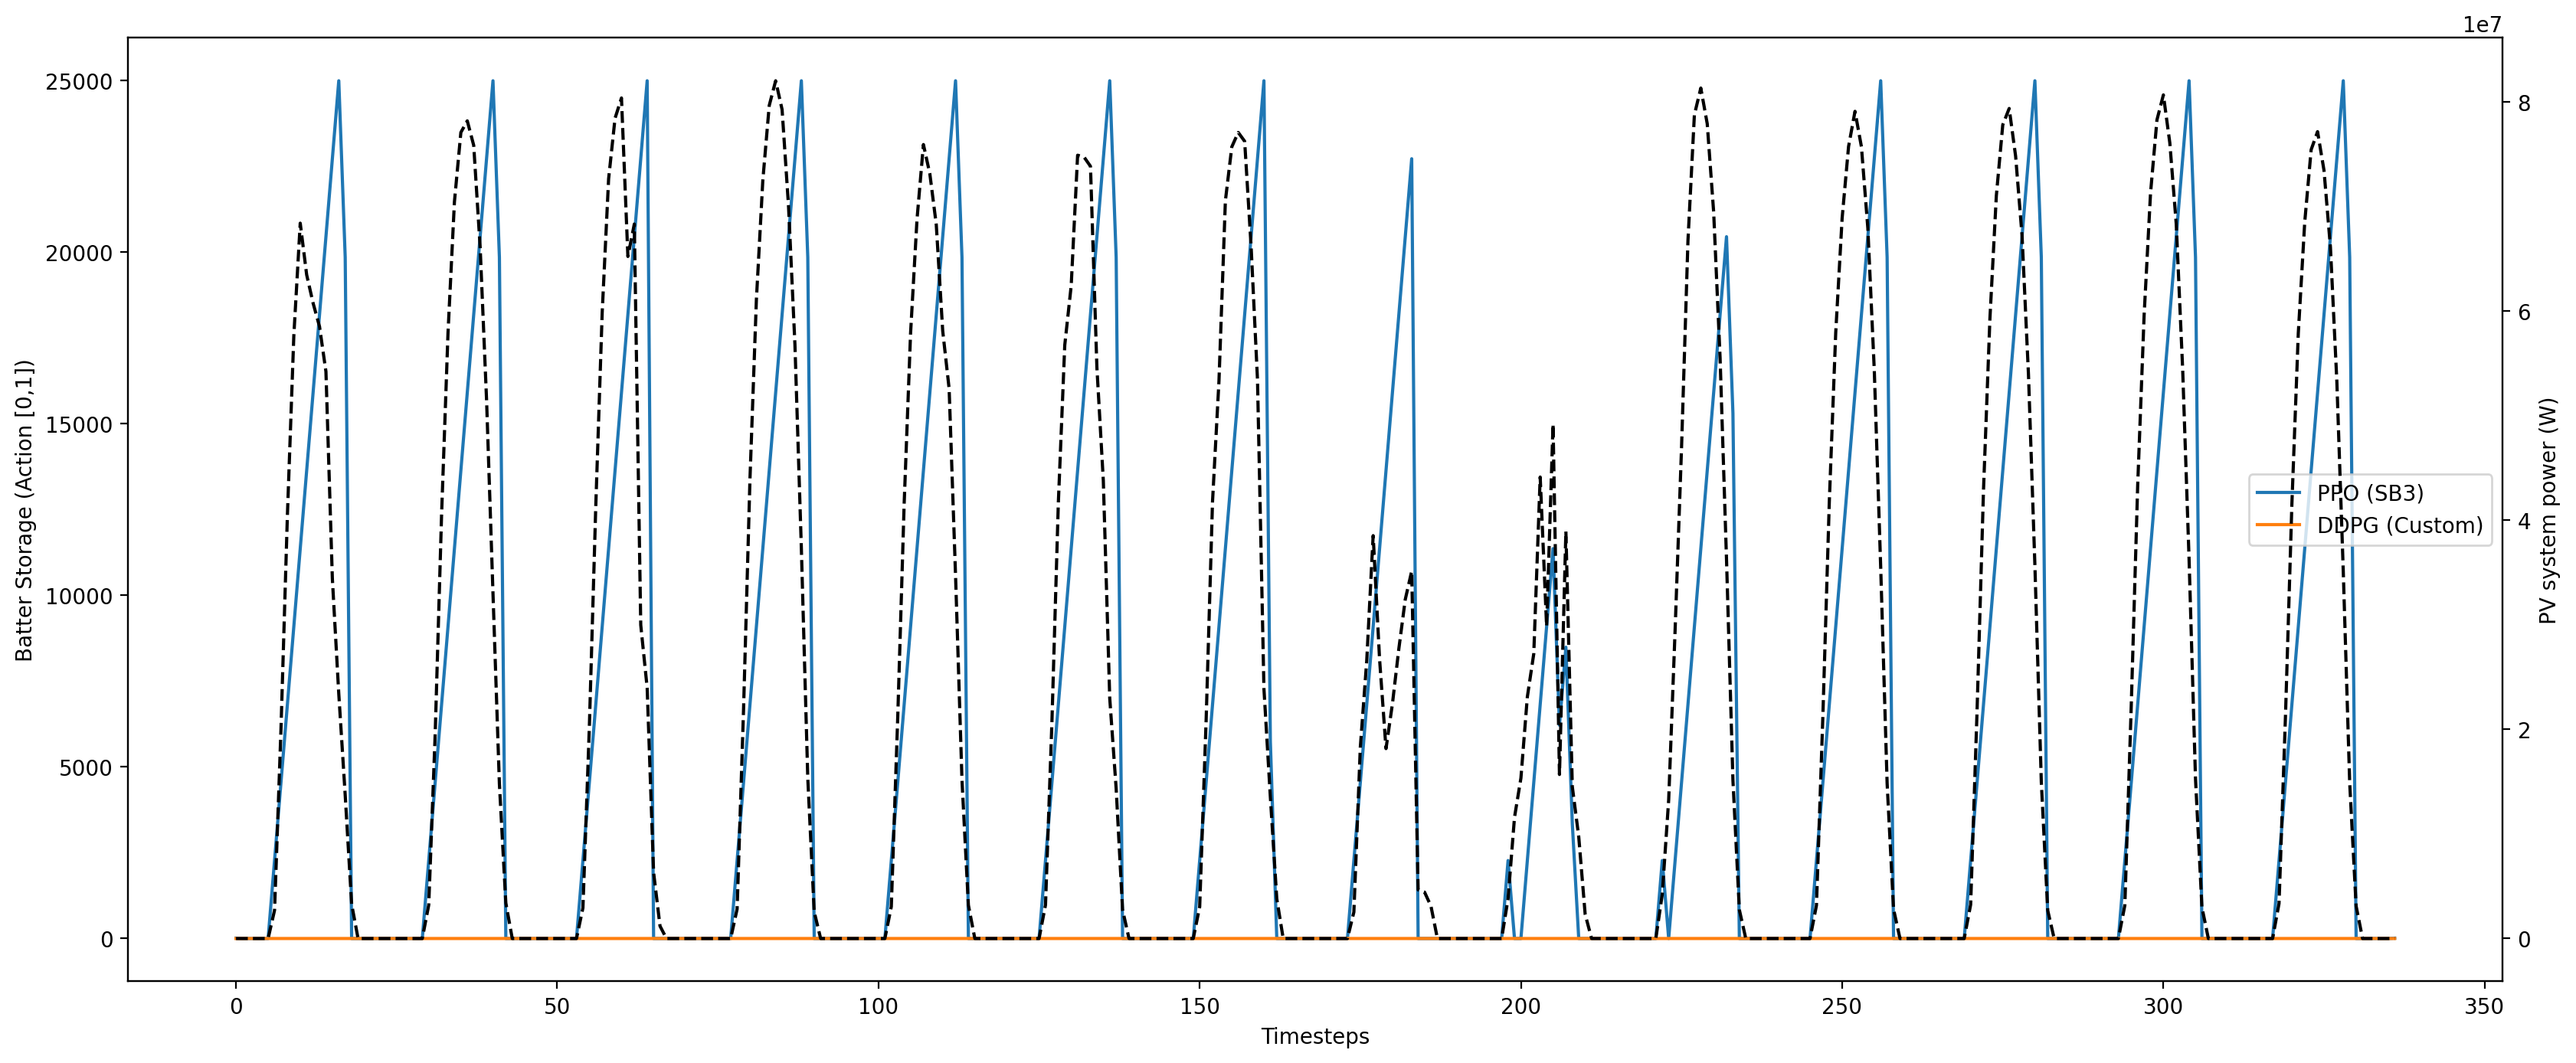

In [24]:
fig,ax = plt.subplots(figsize=(20,8), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(eval_data_ppo["Moles"] , label='PPO (SB3)')
#ax.plot(eval_data_td3["Moles"] , label='TD3 (SB3)')
#ax.plot(eval_data_ddpg["Moles"] , label='DDPG (SB3)')
#ax.plot(eval_data_a2c["Moles"] , label='A2C (SB3)')
ax.plot(eval_data_ddpg_custom["Action1"] , label='DDPG (Custom)')

ax.set_xlabel("Timesteps")
ax.set_ylabel("Batter Storage (Action [0,1])")
ax.legend()

ax2=ax.twinx()
ax2.plot(eval_data_ppo['PV Generation'], color="black", linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)")


plt.show()

Text(0, 0.5, 'PV Generation (Watts)')

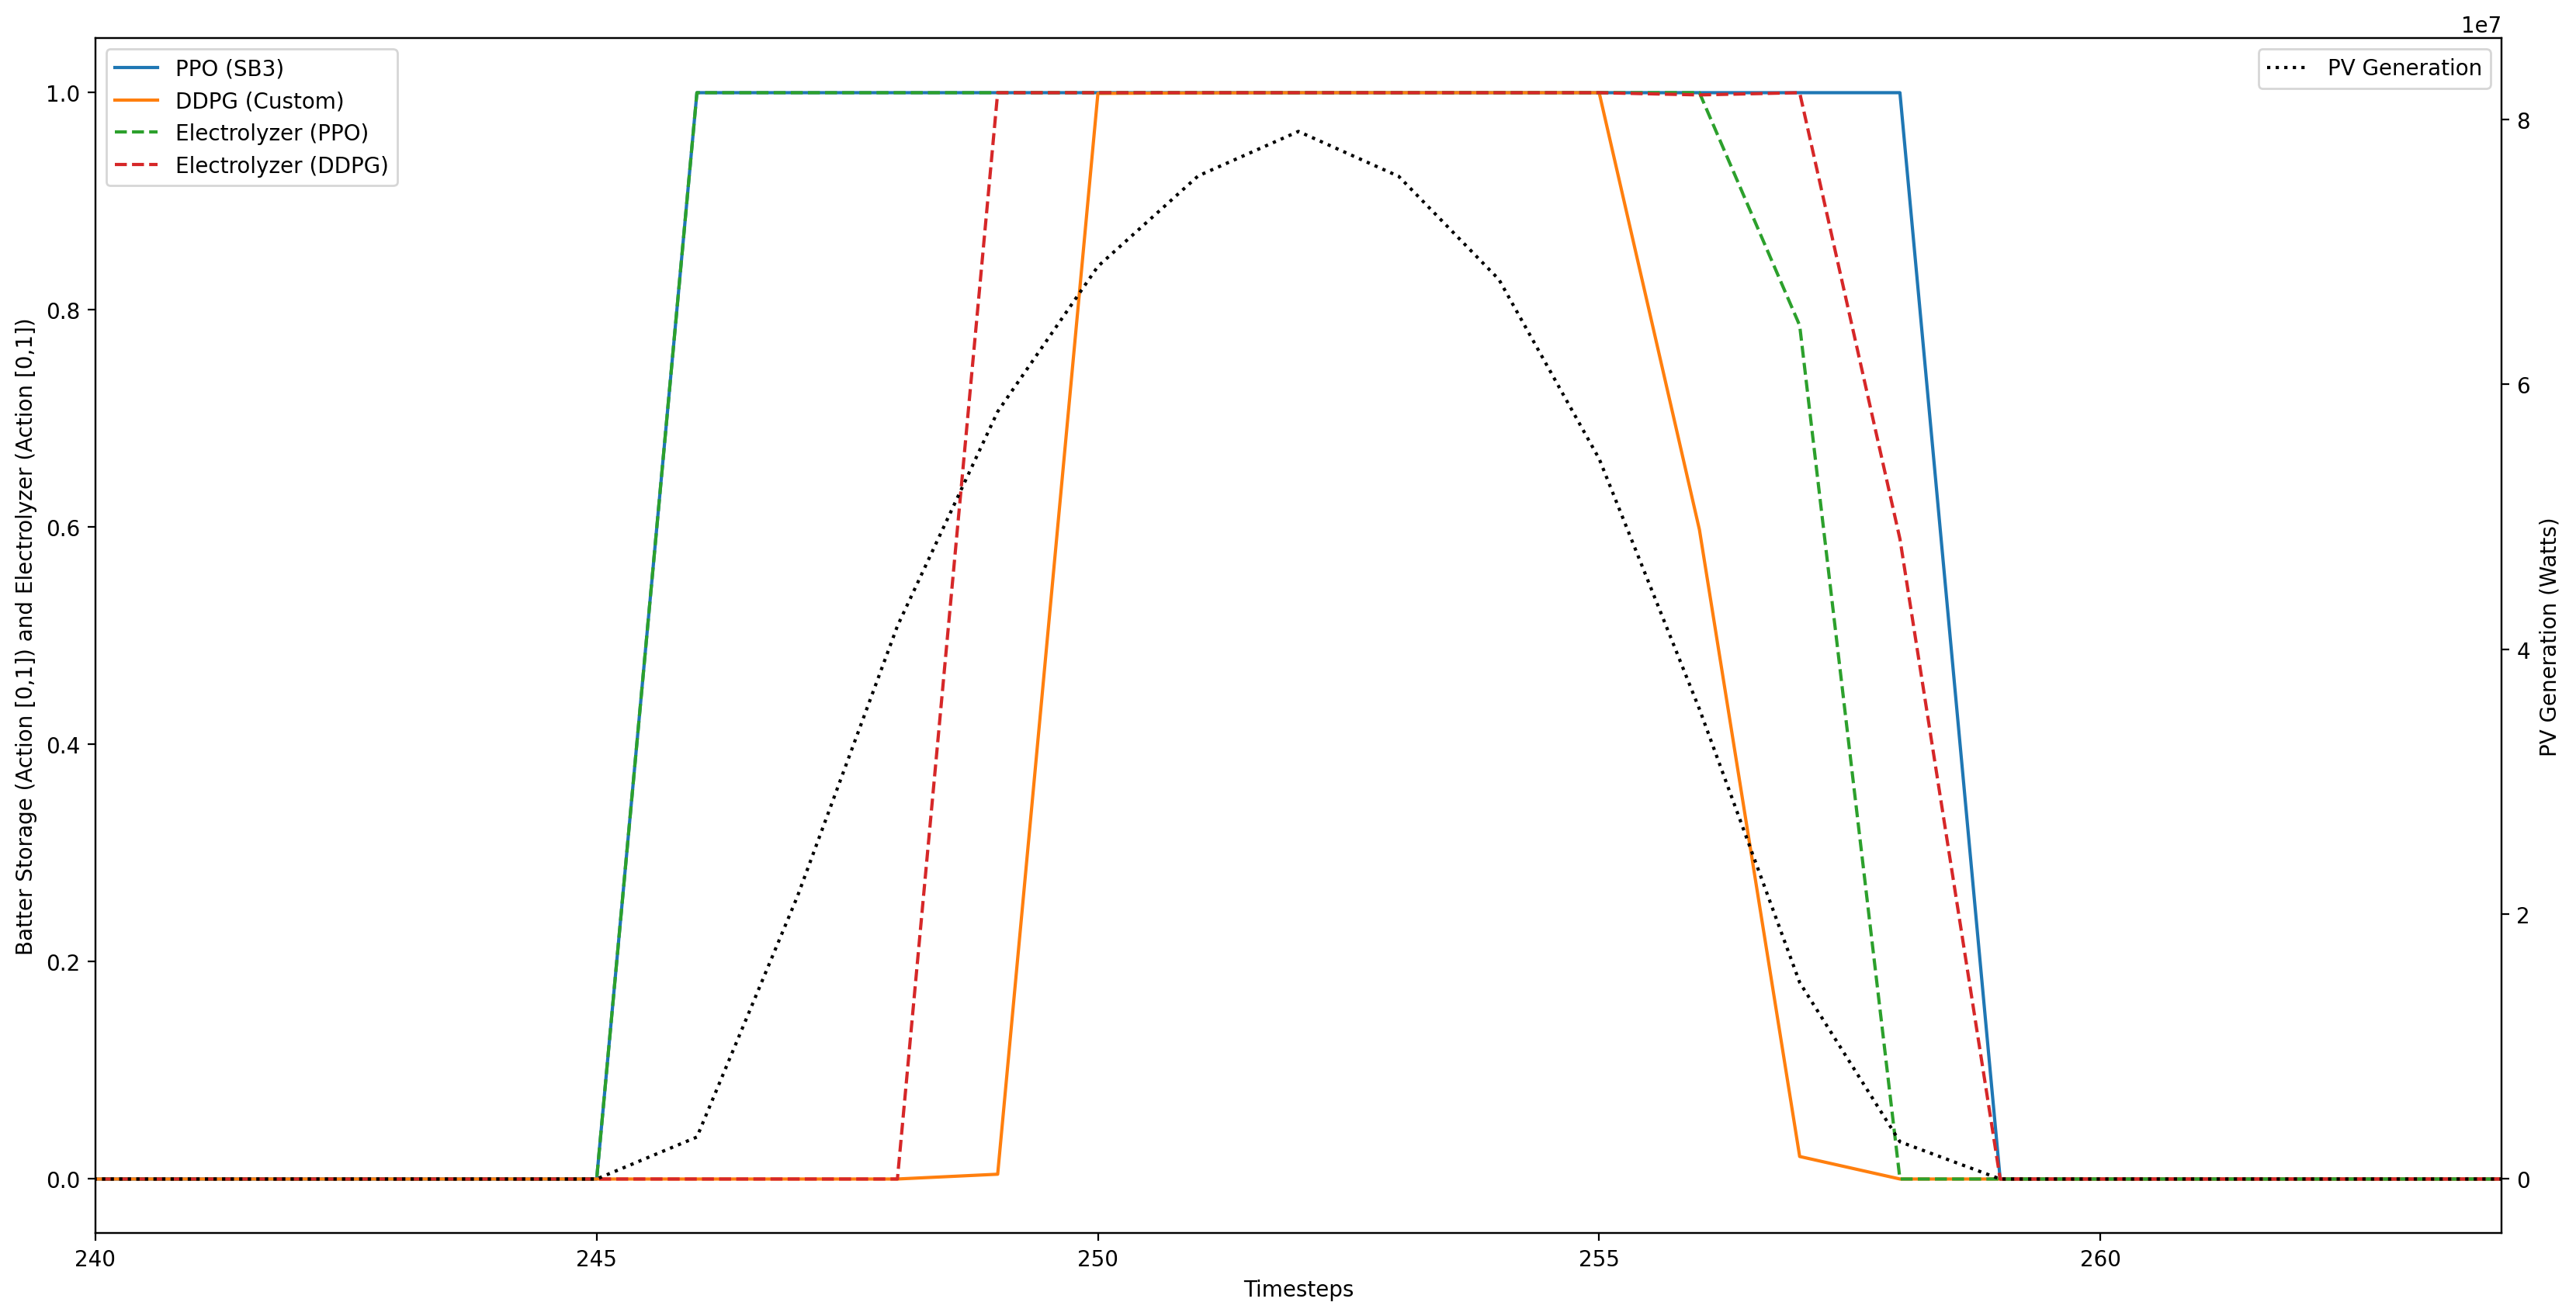

In [25]:
fig,ax = plt.subplots(figsize=(20,10), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(eval_data_ppo["Action1"] , label='PPO (SB3)')

ax.plot(eval_data_ddpg_custom["Action1"] , label='DDPG (Custom)')
ax.plot(eval_data_ppo["Action3"], linestyle='dashed', label='Electrolyzer (PPO)')
ax.plot(eval_data_ddpg_custom["Action3"], linestyle='dashed', label='Electrolyzer (DDPG)')

ax.set_xlabel("Timesteps")
ax.set_ylabel("Batter Storage (Action [0,1]) and Electrolyzer (Action [0,1])")

ax.set_xlim(10*24,(10*24)+24)
ax2=ax.twinx()

ax2.plot(eval_data_ppo['PV Generation'], color="black", linestyle='dotted', label = 'PV Generation')


ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel("PV Generation (Watts)")

## Hydrogen Storage

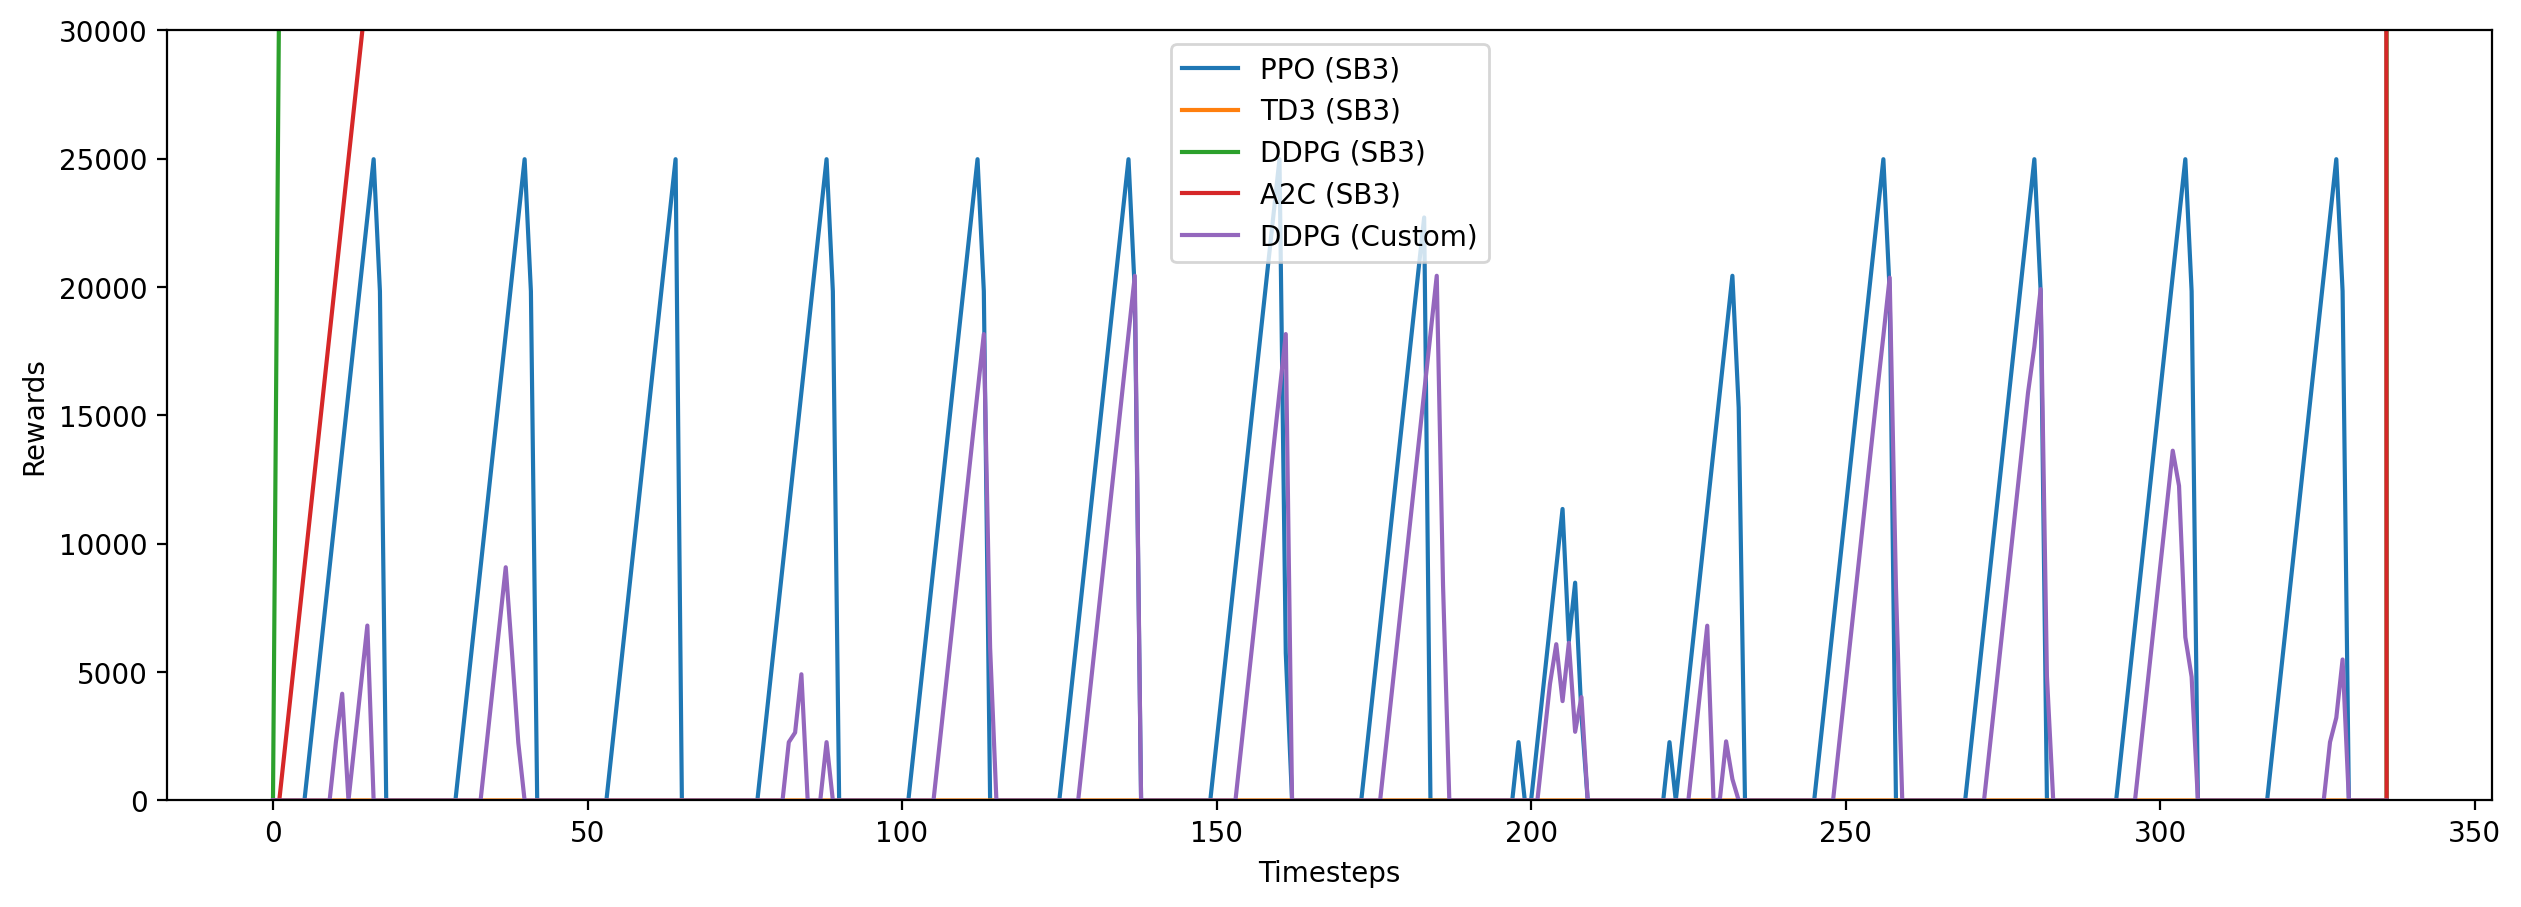

In [26]:
fig, ax = plt.subplots(figsize=(15,5))

# Zeichne die Daten
ax.plot(eval_data_ppo['Moles'] , label='PPO (SB3)')
ax.plot(eval_data_td3["Moles"] , label='TD3 (SB3)')
ax.plot(eval_data_ddpg["Moles"] , label='DDPG (SB3)')
ax.plot(eval_data_a2c["Moles"] , label='A2C (SB3)')
ax.plot(eval_data_ddpg_custom["Moles"] , label='DDPG (Custom)')

ax.set_ylim(0,30000)

# Setze Titel und Beschriftungen
ax.set_xlabel('Timesteps')
ax.set_ylabel('Rewards')

# Füge Legende hinzu
ax.legend()
# Zeige den Plot
plt.show()

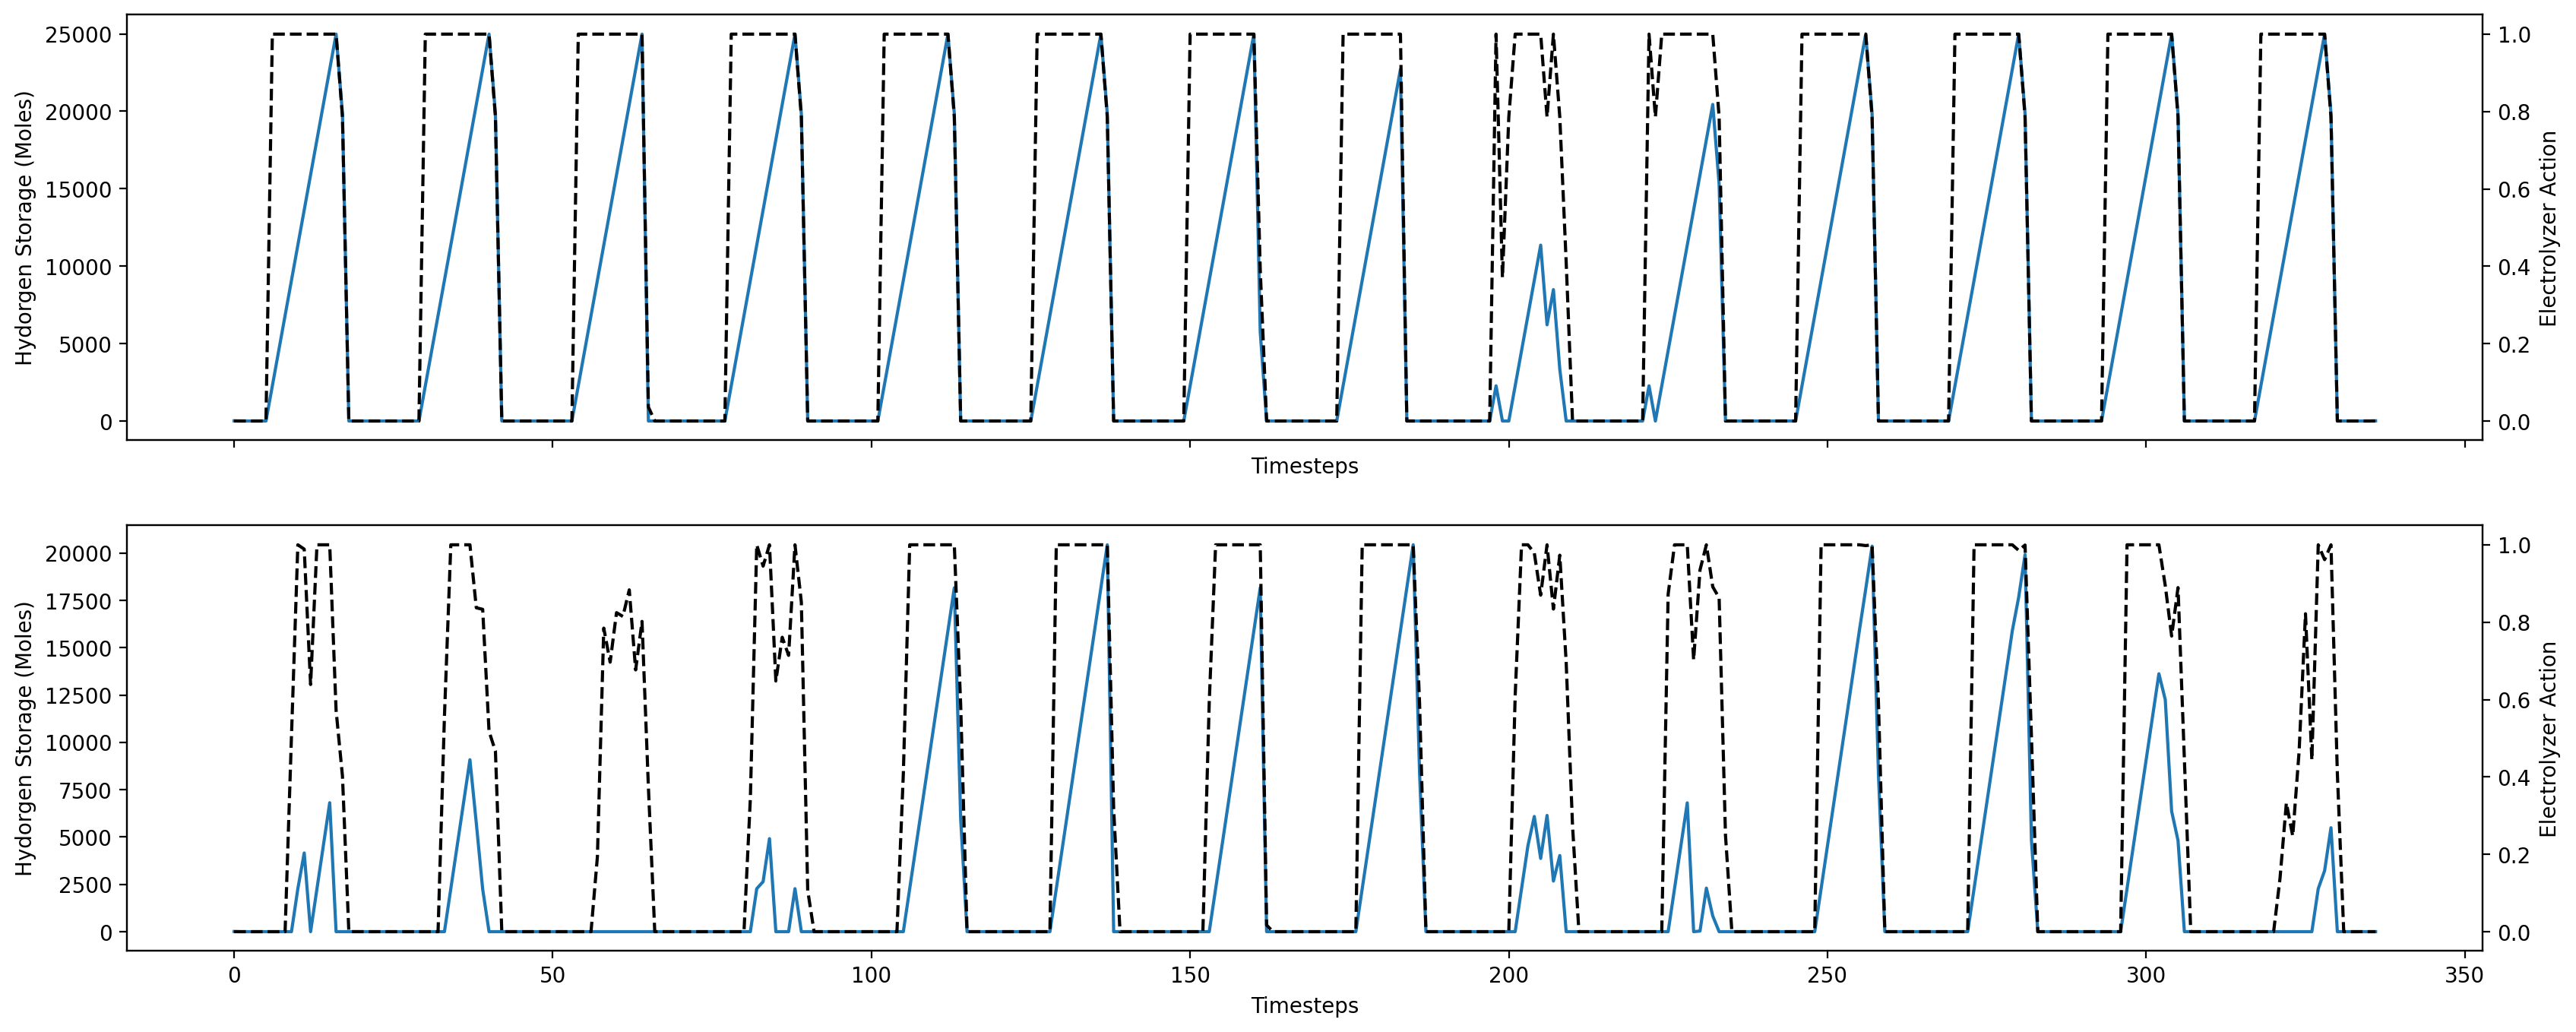

In [27]:
fig, (ax, ax3) = plt.subplots(figsize=(20, 8), sharex=True, nrows=2, ncols=1)

# Plotting on the first subplot
ax.grid(False)
ax.plot(eval_data_ppo['Moles'], label='PPO (SB3)')
ax.set_xlabel("Timesteps")
ax.set_ylabel("Hydorgen Storage (Moles)")


ax2 = ax.twinx()
ax2.plot(eval_data_ppo['Action3'], linestyle='dashed', color='0', label='Electrolyzer Action')
ax2.set_ylabel("Electrolyzer Action")


# Plotting on the second subplot
ax3.grid(False)
# Add your plotting code for ax3 here
# Example:
# ax3.plot(some_other_data, label='Label for second plot')
ax3.plot(eval_data_ddpg_custom['Moles'], label='Hydrogen Storage')
ax3.set_xlabel("Timesteps")
ax3.set_ylabel("Hydorgen Storage (Moles)")


ax4 = ax3.twinx()
# Add your plotting code for ax4 here
# Example:
# ax4.plot(some_other_data_for_ax4, linestyle='dashed', label='Label for ax4')
ax4.plot(eval_data_ddpg_custom['Action3'], linestyle='dashed', color='0', label='Electrolyzer Action')

ax4.set_ylabel("Electrolyzer Action")


#plt.savefig('data/output/DDPG/images/Battery_Radiation_aug21.jpg', dpi=400, bbox_inches='tight')
plt.show()

# Elektrolyzer

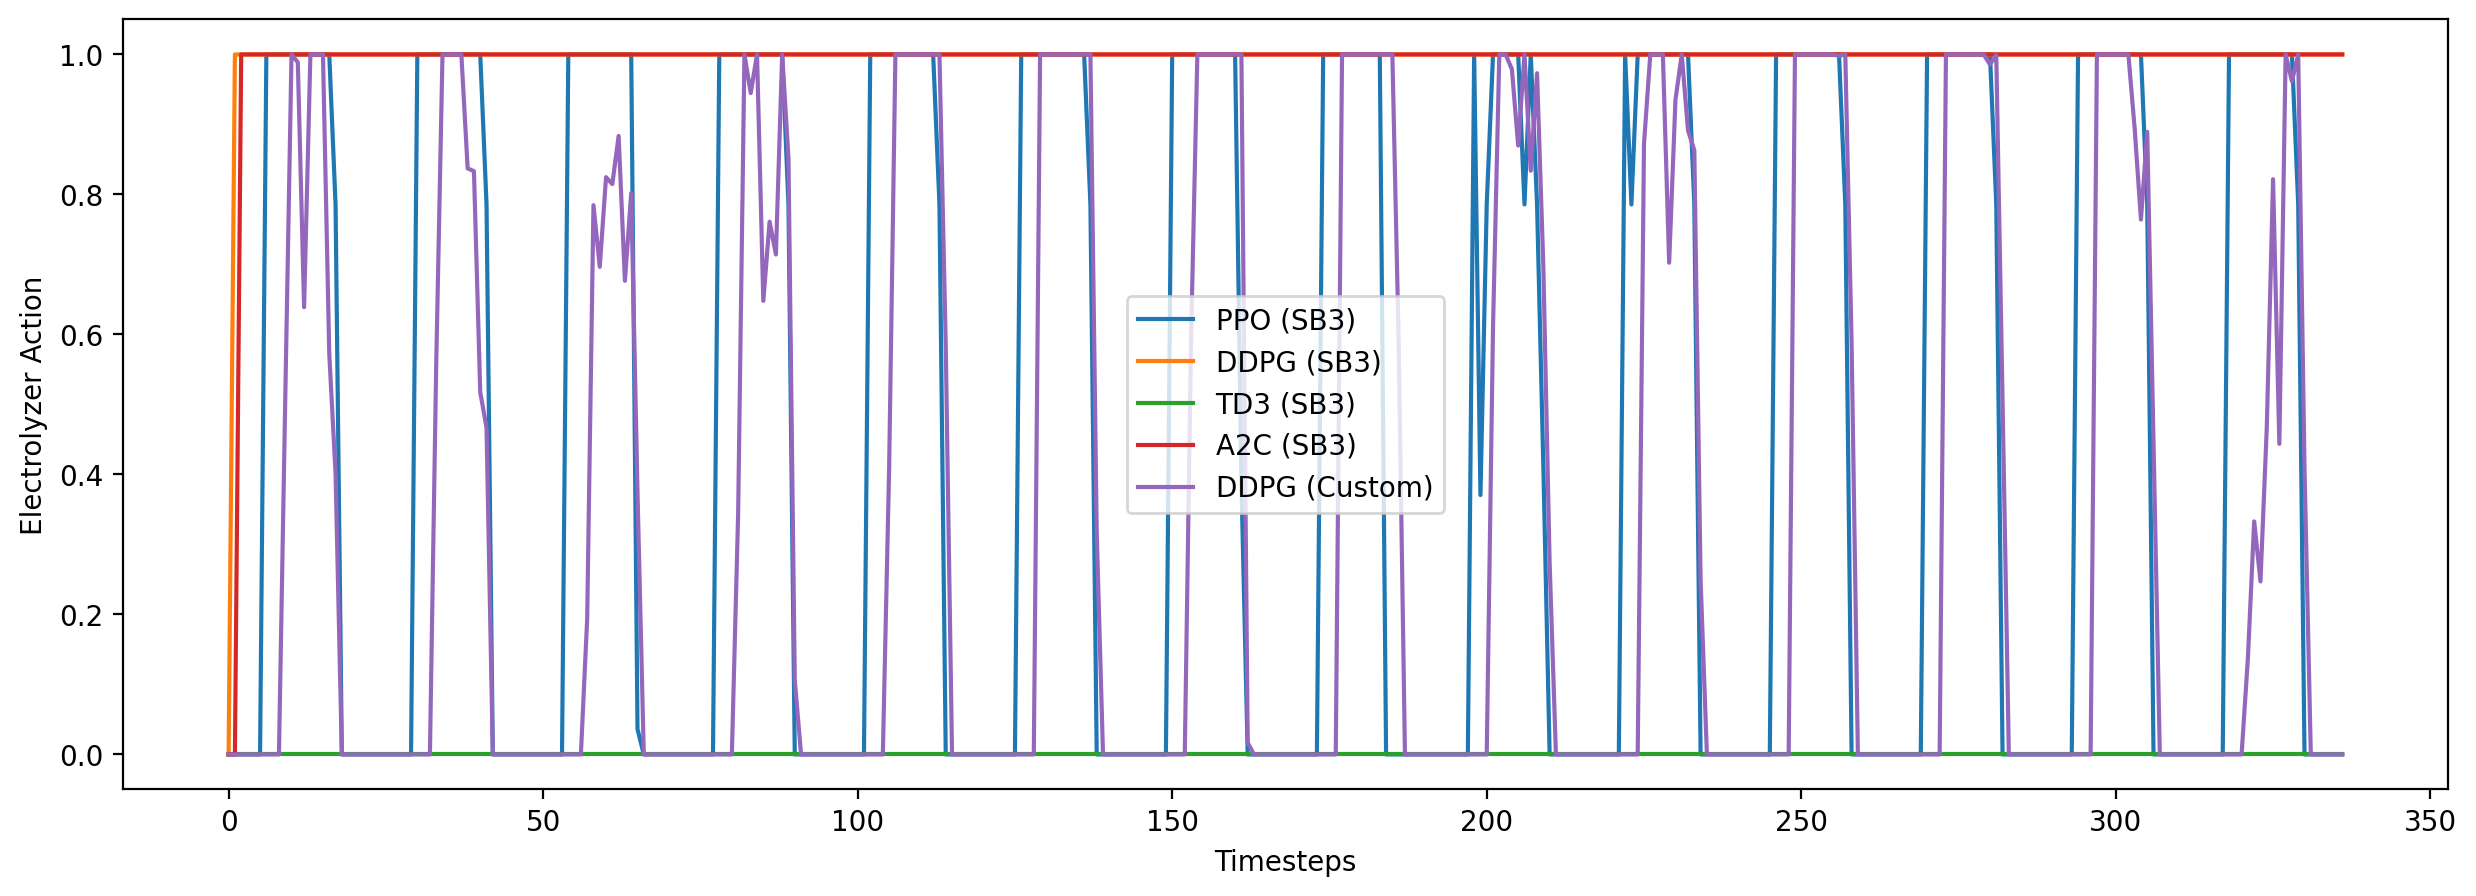

In [28]:

# Erstelle eine Figur und Achsen mit Matplotlib
fig, ax = plt.subplots(figsize=(15,5))

# Zeichne die Daten
ax.plot(eval_data_ppo["Action3"], label='PPO (SB3)')
#ax.plot(rewards_df['reward'], label='DDPG (own development)')
ax.plot(eval_data_ddpg["Action3"], label='DDPG (SB3)')
ax.plot(eval_data_td3["Action3"], label='TD3 (SB3)')
ax.plot(eval_data_a2c["Action3"], label='A2C (SB3)')
ax.plot(eval_data_ddpg_custom["Action3"], label='DDPG (Custom)')
#ax.plot(Progress_A2C["rollout/ep_rew_mean"], label='A2C (SB3)', linestyle=':', marker='o')


# Setze Titel und Beschriftungen
#ax.set_title('Ein Beispielplot für eine Dissertation', fontsize=16)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Electrolyzer Action')


# Füge Legende hinzu
ax.legend()

# Zeige den Plot
plt.show()

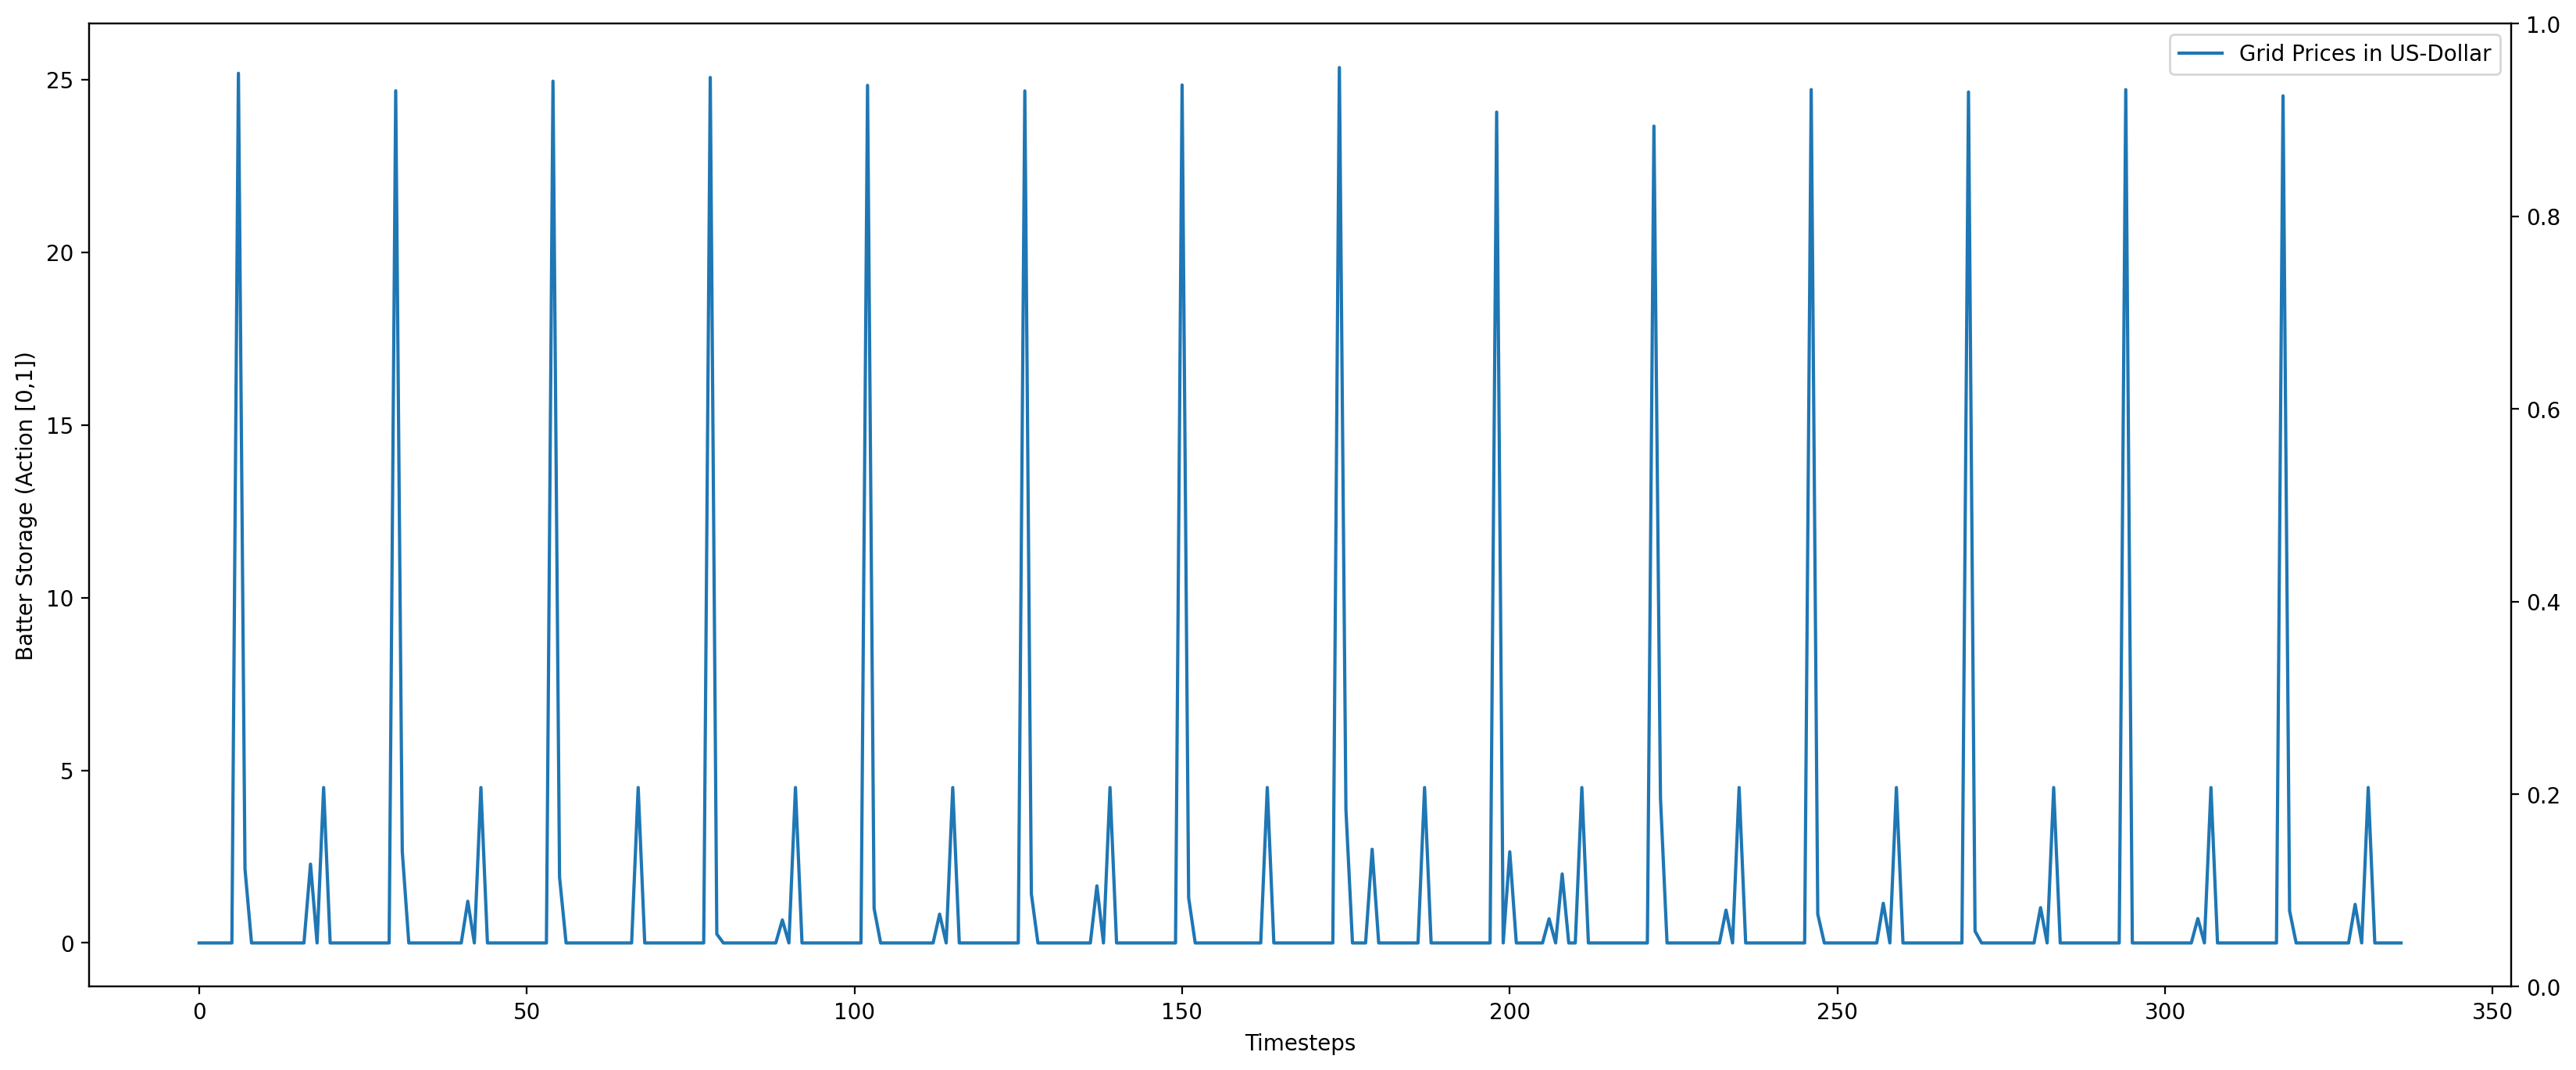

In [35]:
fig,ax = plt.subplots(figsize=(20,8), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(np.maximum(eval_data_ppo["Power"], 0) , label='Grid Prices in US-Dollar')


ax.set_xlabel("Timesteps")
ax.set_ylabel("Batter Storage (Action [0,1])")
ax.legend()

ax2=ax.twinx()
#ax2.plot(eval_data_ppo['Action1'], color="black", linestyle='dashed', label = 'PV Generation')
#ax2.set_ylabel("PV system power (W)")


plt.show()

rest

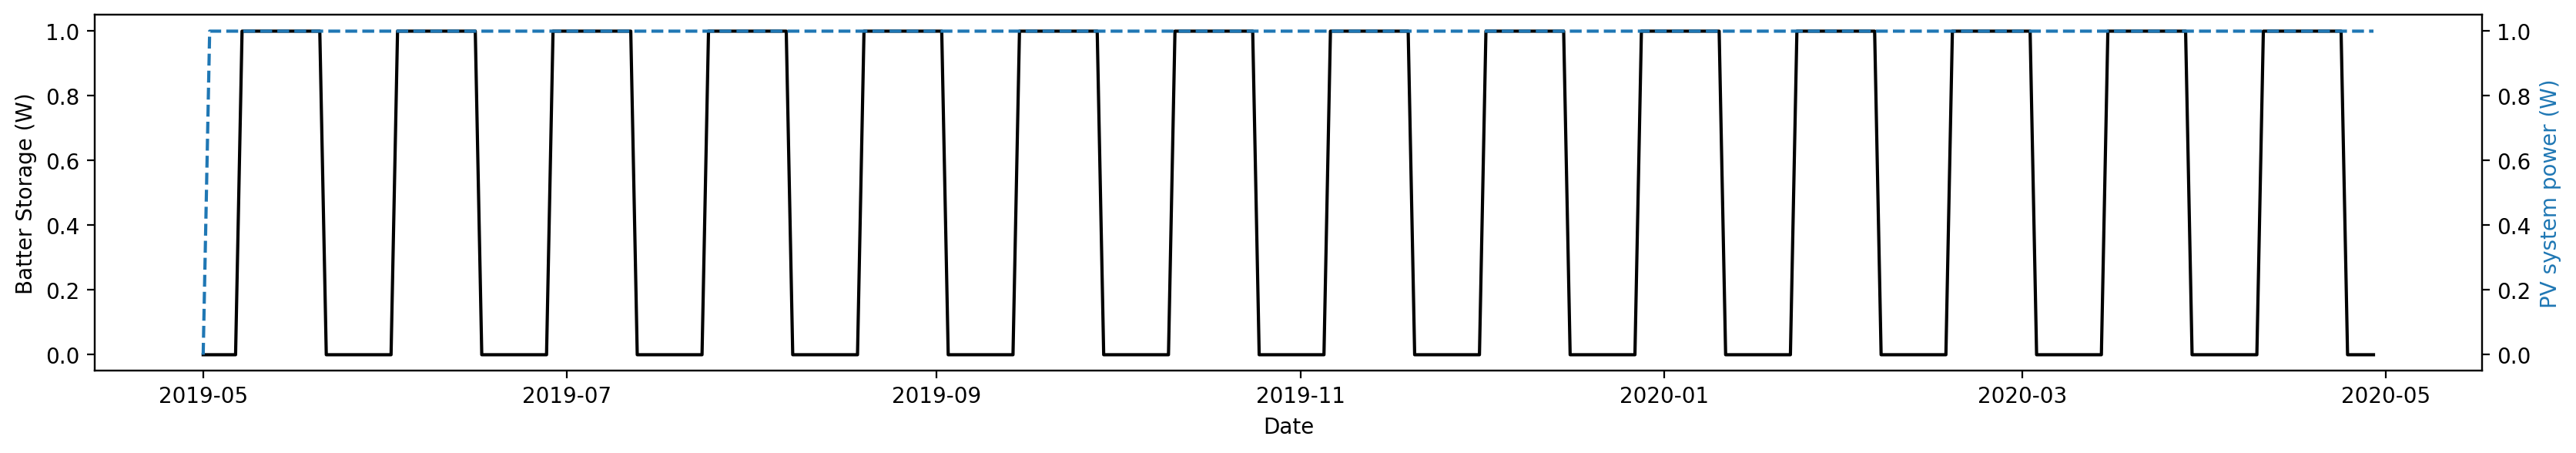

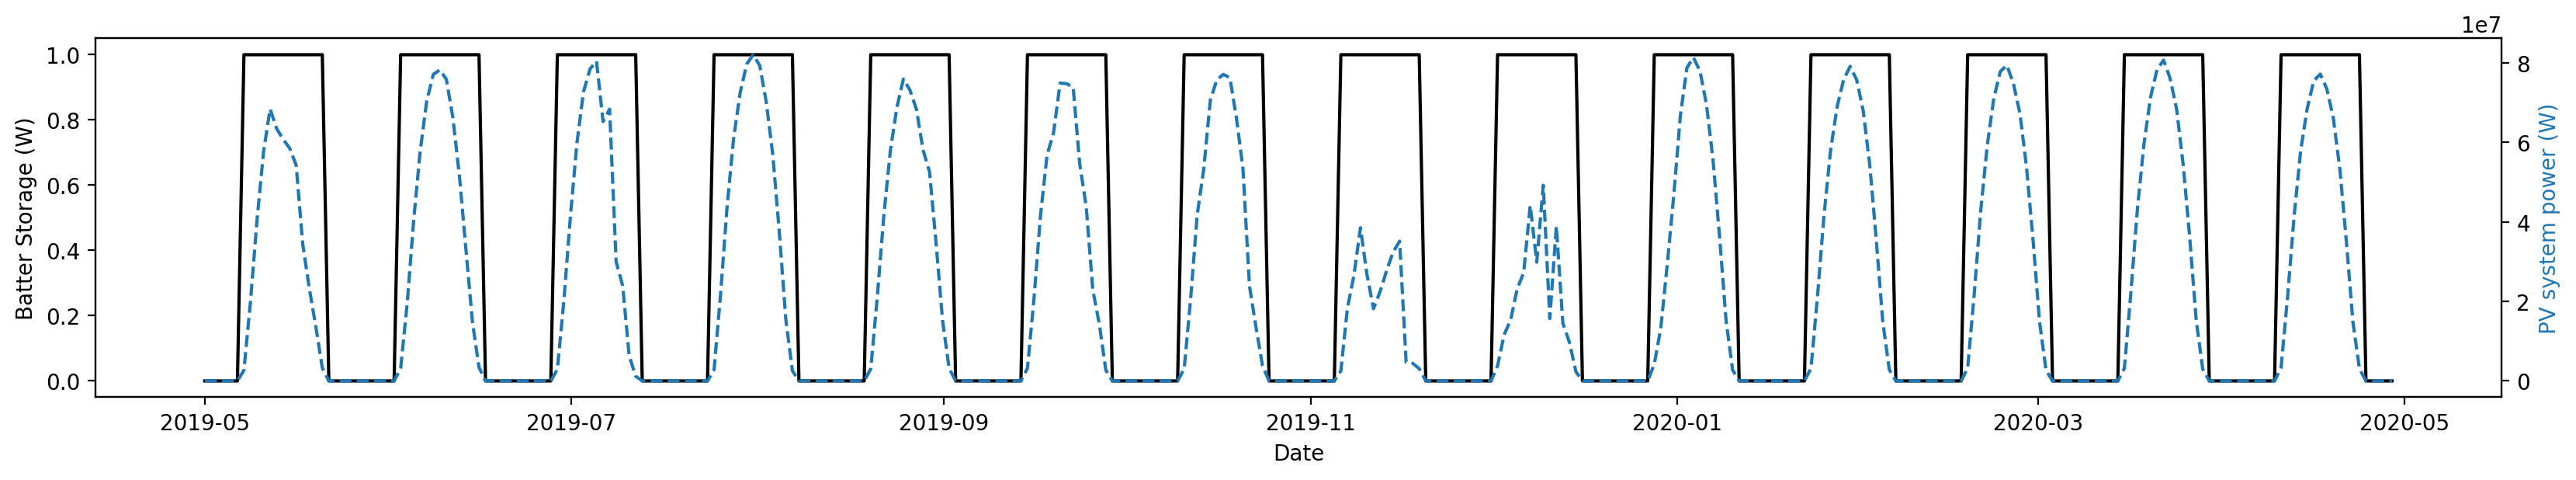

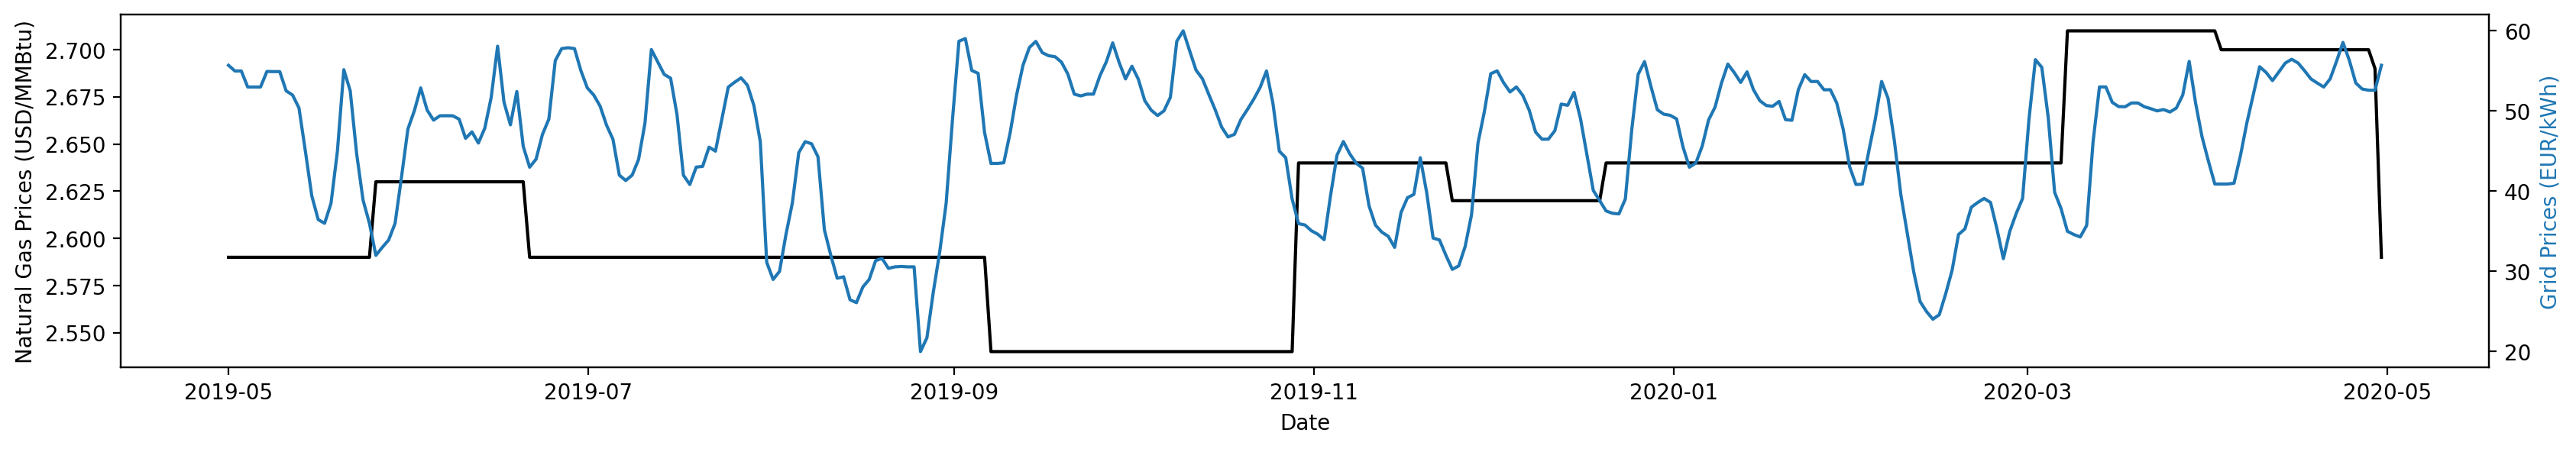

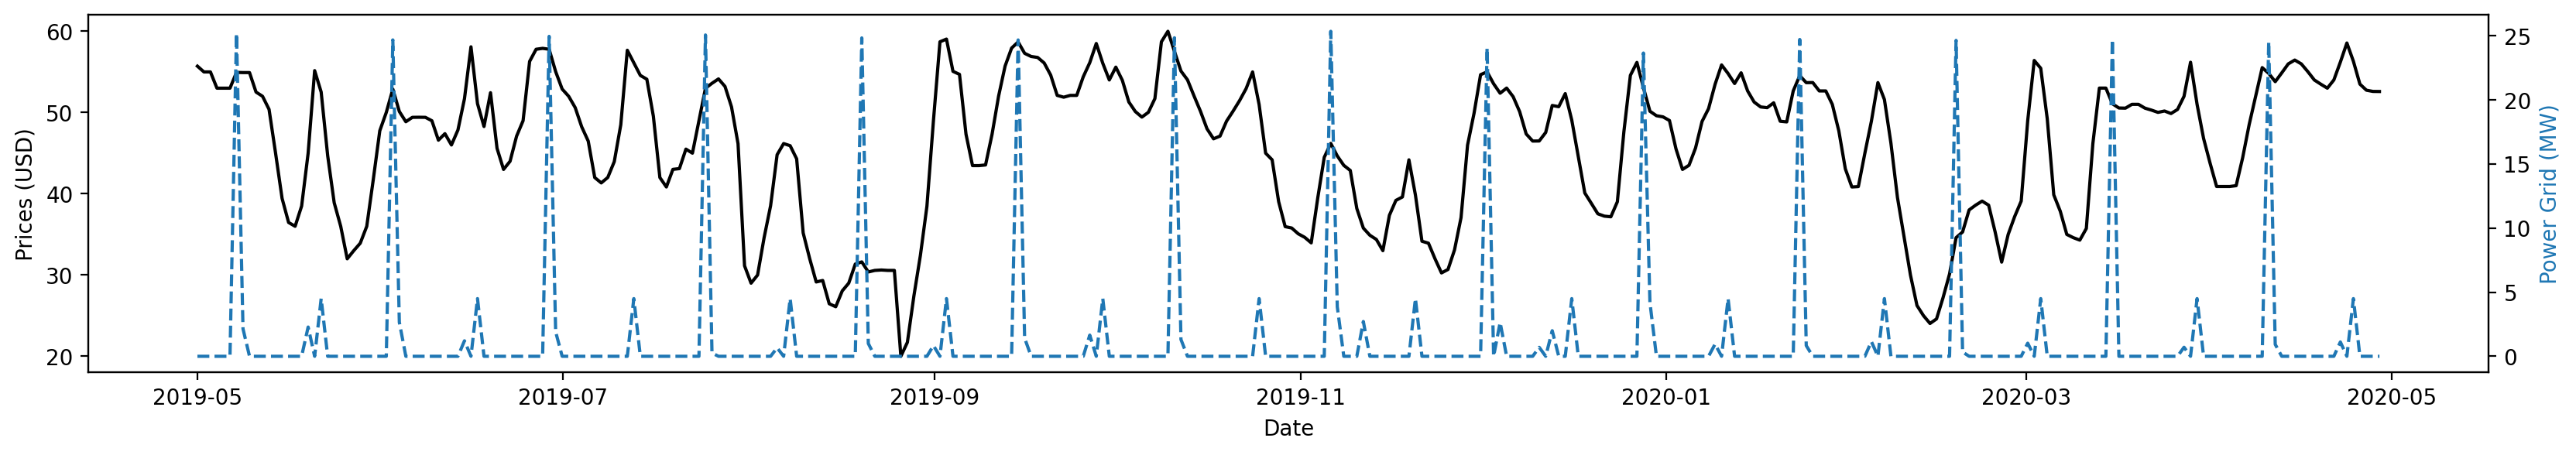

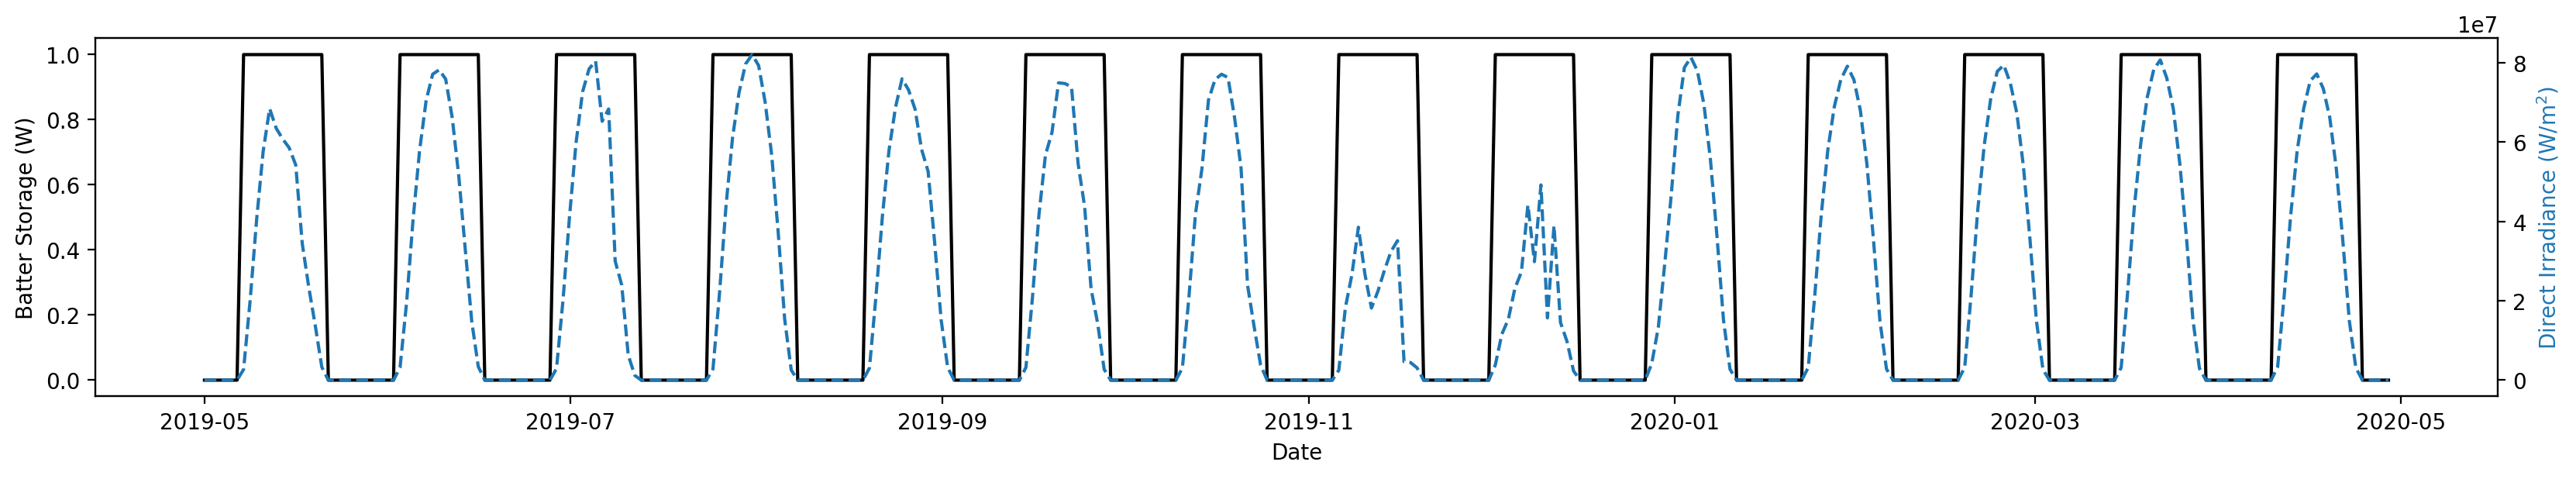

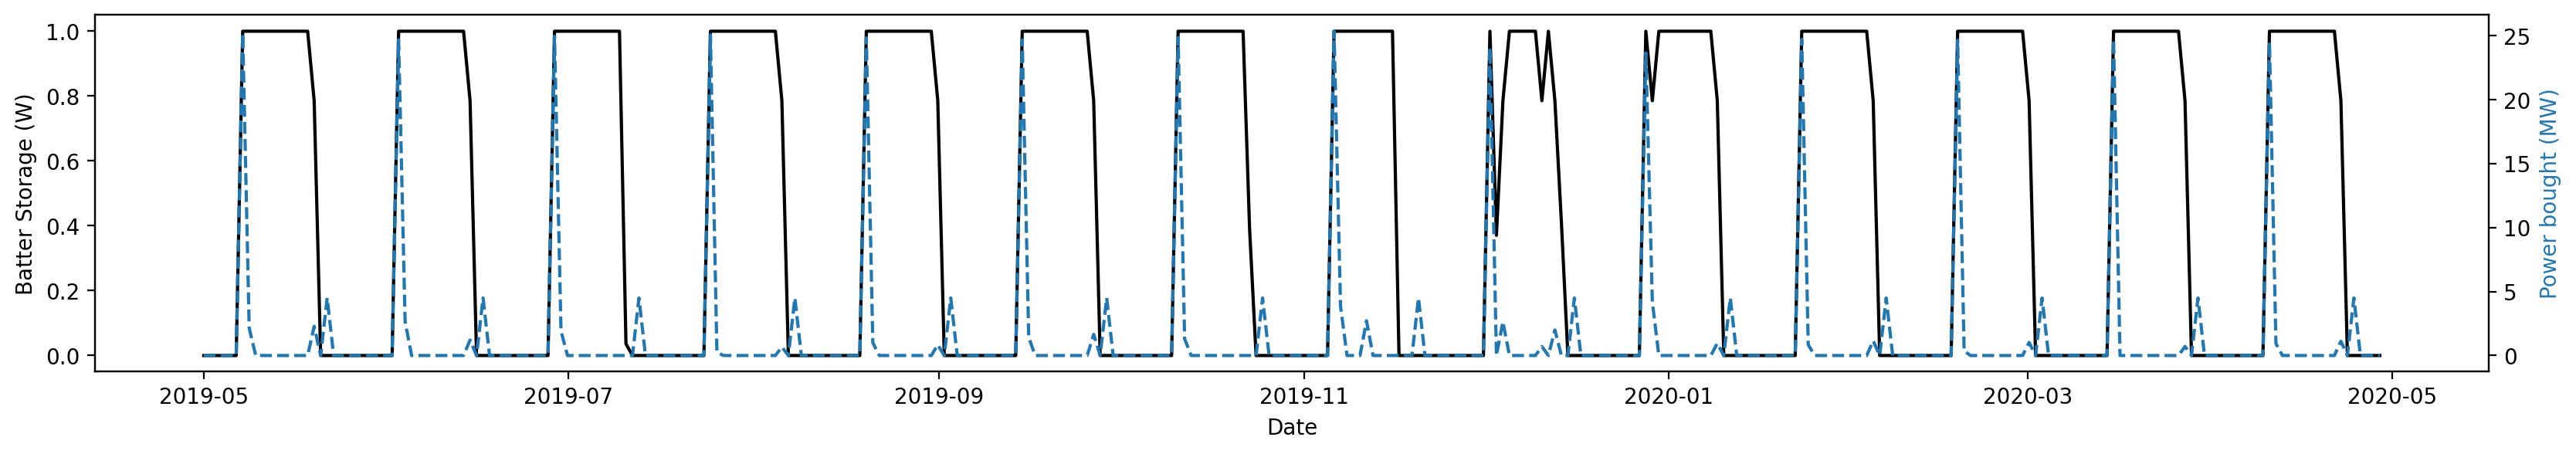

In [30]:
'''

plot_data = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data2 = eval_data.iloc[0+2190:7*24+2190]
plot_data3 = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data4 = eval_data.iloc[0+2190*3-42*24:7*24+2190*3-42*24]
'''
plot_data = eval_data.iloc[0:24*7*2]
plot_data2 = eval_data.iloc[0:24*7*2]
plot_data3 = eval_data.iloc[0:24*7*2]
plot_data4 = eval_data.iloc[0:24*7*2]

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data['Action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data['Action2'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_aug21.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data2['Action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data2['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')
plt.savefig('data/output/DDPG/images/Battery_Radiation_feb21.jpg',  dpi=400, bbox_inches='tight')

plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(eval_data['Prices Natural gas'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Natural Gas Prices (USD/MMBtu)")

ax3=ax.twinx()
ax3.plot(eval_data['Prices'], label = 'Power from Grid')
ax3.set_ylabel("Grid Prices (EUR/kWh)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid.jpg',  dpi=400, bbox_inches='tight')
plt.show()


fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)


ax.plot(plot_data4['Prices'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Prices (USD)")

ax2=ax.twinx()
ax2.plot(np.maximum(0, plot_data4['Power']), linestyle='dashed', label = 'Power from Grid')
ax2.set_ylabel("Power Grid (MW)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data4['Action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data4['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Direct Irradiance ($W/m^2$)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
ax.plot(plot_data4['Action3'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()

ax2.plot(np.maximum(0, plot_data4['Power']), linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Power bought (MW)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_EnergyGrid.jpg',  dpi=400, bbox_inches='tight')
plt.show()





Average price

In [31]:

print("Average Grid Prices:", np.average(plot_data4['Prices']))
power = np.maximum(0, plot_data4['Power']* plot_data4['Prices'])
print("Average Buy Prices:", np.average(power) )



Average Grid Prices: 46.11190476190476
Average Buy Prices: 68.33131850688386


### Electrolyzer

## Policy Evaluation

In [32]:
policy_data = pkl.load(open('data/output/PPO/PPO_policy_eval.pkl', 'rb'))

In [33]:
len(policy_data)

7466910

In [34]:
policy_data.tail(10)


# Action1 = storage
# Action3 = Electrolyzer

Action1  Action2  Action3  Grid Prices  Battery Level  Moles  \
7466900      1.0      1.0      1.0          109        5000000  50000   
7466901      1.0      1.0      1.0          109        5000000  50000   
7466902      1.0      1.0      1.0          109        5000000  50000   
7466903      1.0      1.0      1.0          109        5000000  50000   
7466904      1.0      1.0      1.0          109        5000000  50000   
7466905      1.0      1.0      1.0          109        5000000  50000   
7466906      1.0      1.0      1.0          109        5000000  50000   
7466907      1.0      1.0      1.0          109        5000000  50000   
7466908      1.0      1.0      1.0          109        5000000  50000   
7466909      1.0      1.0      1.0          109        5000000  50000   

         Gas Prices  Sun Power  
7466900           1  100000000  
7466901           2  100000000  
7466902           3  100000000  
7466903           4  100000000  
7466904           5  100000000  
7466905           6  100000000  
7466906           7  100000000  
7466907           8  100000000  
7466908           9  100000000  
7466909          10  100000000